# Challenge Exploratory Data Analysis

The challenge is divided in two parts:

    1- Extracting the data
    2- Exploring the data

## 1 - Extracting the data

We are going to work with data about near Earth objects.

Here is a schema of the format (and an example): https://any-api.com/neowsapp_com/neowsapp_com/docs/neo/browseNearEarthObjects

Also you can use this page to understand the schema:
https://jsonvisio.com/editor

### Partial data
Load info of: http://www.neowsapp.com/rest/v1/neo/browse.

Load the data of 'near_earth_objects' into a dataframe, with as much granularity as possible.

HINT: Use requests library on that URL

# Respuesta Challenge

### 1) Importamos librerias necesarias para la extracción de los datos y el análisis de los mismos

In [1]:
import numpy as np
import json
import pandas as pd
import requests
from pandas import json_normalize
from datetime import datetime
import time

### 2) Antes de la extracción de los datos, asignamos la URL a usar a una variable

In [2]:
# Guardamos en una variable la URL de la API
# Usamos la función 'request' para realizar la solicitud HTTP GET a la URL
# Luego usamos la funcion 'get' para enviar la solicitud HTTP a la URL y devolver la respuesta en la variable 'resp'
# Con la funcion 'json.loads' decodificamos datos JSON que se reciben desde la API 

URL = 'http://www.neowsapp.com/rest/v1/neo/browse?page=0&size=20'
resp = requests.get(URL)
info = json.loads(resp.content)

# En la variable 'num_pages' guardamos el objeto 'info' con sus atributos 'page' y 'total_pages'

num_pages = info['page']['total_pages']

### 3) Realizamos la extracción y transformación de los datos en la siguiente celda, detallando cada paso con comentarios

In [3]:
%%time

# Usamos '%%time' para medir el tiempo de ejecución del código

# Primero intentamos examinar si ya existe el CSV del dataset guardado
# En caso de que exista, buscamos su última 'page' y sumamos 1 a la misma, si no existe, arrancamos de 0 con la iteración

try:
    df_asteroids = pd.read_csv('./df_asteroids.csv')
    pag_max = df_asteroids['page'].max() + 1
except:
    pag_max = 0

# Comenzamos el bucle en el valor de 'pag_max', e iteramos sobre el objeto 'info'
    
for i in range(pag_max, info['page']['total_pages']):
    try: 
        
        # Esperamos 30 segundos si el número de página es un múltiplo de 1000, de lo contrario, imprime el número de página
        time.sleep(30) if i%1000 == 0 else print(i) 
        
        # Hacemos una solicitud a la URL para obtener la información de los asteroides
        resp1 = requests.get('http://www.neowsapp.com/rest/v1/neo/browse?page='+str(i)+'&size=20')
        
        # Cargamos la respuesta en formato JSON y normalizamos los datos utilizando la función json_normalize()
        # Primero el json de near earth objects (df) y luego el de close approach date (df1)
        info = json.loads(resp1.content)
        df = json_normalize(info['near_earth_objects'])
        df1 = pd.json_normalize(info, 
                                record_path=['near_earth_objects','close_approach_data'], 
                                meta=[['near_earth_objects','id']]
                                )
        
        # Le damos formato fecha a la columna 'close_approach_date' del dataframe 'df1'
        df1['close_approach_date'] = pd.to_datetime(df1['close_approach_date'], format="%Y-%m-%d")
        
        # Filtramos el df1 con los datos donde close_approach_date sea menor a la fecha actual
        filtered_df1 = df1.loc[(df1['close_approach_date'] < datetime.now())]
        
        # Agrupo el dataframe df1 por ID y veo la forma de los grupos
        filtered_df1_by_id_date_df = filtered_df1[filtered_df1.groupby(['near_earth_objects.id'])['close_approach_date'].transform(max) == filtered_df1['close_approach_date']]
        
        # Concateno los dataframes finales (filtered_df1_by_id_date_df y df)
        df_asteroids = pd.merge(
                                left=df,
                                right=filtered_df1_by_id_date_df,
                                how='left',
                                left_on='id',
                                right_on='near_earth_objects.id'
                               )
        
        # Asigno la columna 'page' al dataframe final y la determino como la variable 'i' para iterarla
        df_asteroids['page'] = i
        
        # Si este es el primer bucle (si i es igual a 0), el código establece el dataframe resultante como "df_asteroids_new"
        # Si no es el primer bucle, el código concatena el dataframe resultante con el dataframe original "df_asteroids_new"
        if i==0:
            df_asteroids_new = df_asteroids

        else:
            df_asteroids_new = pd.concat([df_asteroids_new, df_asteroids], axis=0, ignore_index = True)
        
    
    # Si ocurre algún error, el código continúa con el siguiente bucle sin guardar ningún dato y emitiendo un mensaje de error
    except:
        continue
        print('Ocurrio un error en la lectura de la página {}'.format(i))   
        df_asteroids_new.to_csv('./df_asteroids.csv',index=False)

C:\Users\Gustavo\anaconda3\lib\site-packages\IPython\core\magics\execution.py:1324: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
Wall time: 6min 42s


### 4) Ya tenemos el dataset asi que comenzamos con el análisis y limpieza del mismo

In [4]:
# Traemos el dataset y observamos las primeras y ultimas 5 filas
data = pd.read_csv('./df_asteroids.csv')
data.head()

C:\Users\Gustavo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles,near_earth_objects.id,page,sentry_data
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.31,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,6.044918,21761.703426,13521.876221,0.208599,81.144889,3.120592e+07,1.939046e+07,2000433.0,0,NaN
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.57,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,3.724128,13406.862011,8330.502676,1.486599,578.286919,2.223920e+08,1.381880e+08,2000719.0,0,NaN
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.87,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,11.662198,41983.913978,26087.171438,0.337966,131.468729,5.055898e+07,3.141589e+07,2000887.0,0,NaN
3,2001036,2001036,1036 Ganymed (A924 UB),Ganymed,1036,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001036,9.23,False,"[{'close_approach_date': '1910-02-25', 'close_...",False,...,14.304701,51496.923293,31998.185476,0.359104,139.691571,5.372124e+07,3.338083e+07,2001036.0,0,NaN
4,2001221,2001221,1221 Amor (1932 EA1),Amor,1221,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001221,17.40,False,"[{'close_approach_date': '1900-03-08', 'close_...",False,...,15.600595,56162.140661,34896.970124,0.368013,143.156888,5.505390e+07,3.420890e+07,2001221.0,0,NaN


In [5]:
data.tail()

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles,near_earth_objects.id,page,sentry_data
30317,54275853,54275853,(2022 GP5),NaN,2022 GP5,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54275853,23.381,False,"[{'close_approach_date': '2022-04-29', 'close_...",False,...,11.834637,42604.694355,26472.900223,0.065358,25.424453,9.777491e+06,6.075451e+06,54275853.0,1468,NaN
30318,54275865,54275865,(2022 GQ5),NaN,2022 GQ5,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54275865,31.678,False,"[{'close_approach_date': '1945-07-31', 'close_...",False,...,14.737300,53054.278314,32965.865322,0.002716,1.056640,4.063524e+05,2.524956e+05,54275865.0,1468,NaN
30319,54275865,54275865,(2022 GQ5),NaN,2022 GQ5,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54275865,31.678,False,"[{'close_approach_date': '1945-07-31', 'close_...",False,...,14.181691,51054.089177,31723.025578,0.000127,0.049279,1.895127e+04,1.177577e+04,54275865.0,1468,NaN
30320,54275914,54275914,(2022 GT5),NaN,2022 GT5,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54275914,21.933,False,"[{'close_approach_date': '2022-05-16', 'close_...",False,...,18.757023,67525.282313,41957.584446,0.164335,63.926450,2.458422e+07,1.527592e+07,54275914.0,1468,NaN
30321,627e9c9fab3ece0004d145be,627e9c9fab3ece0004d145be,NaN,NaN,NaN,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=627e9c9f...,NaN,False,[],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1468,NaN


In [6]:
# Observamos la cantidad de columnas, la clase del objeto data, la cantidad de datos no perdidos, los tipos de cada uno y la 
# forma del dataset (filas y columnas)

data.info()
print("El dataset tiene " + str(data.shape[0]) + " filas y " + str(data.shape[1]) + " columnas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30322 entries, 0 to 30321
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   id                                                    30322 non-null  object 
 1   neo_reference_id                                      30322 non-null  object 
 2   name                                                  30318 non-null  object 
 3   name_limited                                          166 non-null    object 
 4   designation                                           30318 non-null  object 
 5   nasa_jpl_url                                          30322 non-null  object 
 6   absolute_magnitude_h                                  30309 non-null  float64
 7   is_potentially_hazardous_asteroid                     30322 non-null  bool   
 8   close_approach_data                                   30

In [7]:
# Hacemos una copia del dataset para trabajar sobre ella

data_new = data.copy()

In [8]:
# Eliminamos columnas que no sirven para el analisis

columns = ['neo_reference_id','name_limited','designation','nasa_jpl_url', 'links.self','close_approach_data','sentry_data',
           'near_earth_objects.id', 'page', 'estimated_diameter.meters.estimated_diameter_min', 
           'estimated_diameter.meters.estimated_diameter_max', 'estimated_diameter.miles.estimated_diameter_min', 
           'estimated_diameter.miles.estimated_diameter_max', 'estimated_diameter.feet.estimated_diameter_min',       
           'estimated_diameter.feet.estimated_diameter_max', 'relative_velocity.kilometers_per_second',
           'relative_velocity.miles_per_hour']

data_new = data_new.drop(columns, axis=1)

In [9]:
# Observamos qué forma tiene el dataset

data_new.shape

(30322, 41)

In [10]:
# Observamos el tipo de cada dato del data_new

data_new.dtypes

id                                                       object
name                                                     object
absolute_magnitude_h                                    float64
is_potentially_hazardous_asteroid                          bool
is_sentry_object                                           bool
estimated_diameter.kilometers.estimated_diameter_min    float64
estimated_diameter.kilometers.estimated_diameter_max    float64
orbital_data.orbit_id                                    object
orbital_data.orbit_determination_date                    object
orbital_data.first_observation_date                      object
orbital_data.last_observation_date                       object
orbital_data.data_arc_in_days                           float64
orbital_data.observations_used                          float64
orbital_data.orbit_uncertainty                          float64
orbital_data.minimum_orbit_intersection                 float64
orbital_data.jupiter_tisserand_invariant

In [11]:
# Vemos cuales columnas quedaron y sus nulos

data_new.isnull().sum()

id                                                        0
name                                                      4
absolute_magnitude_h                                     13
is_potentially_hazardous_asteroid                         0
is_sentry_object                                          0
estimated_diameter.kilometers.estimated_diameter_min     13
estimated_diameter.kilometers.estimated_diameter_max     13
orbital_data.orbit_id                                     4
orbital_data.orbit_determination_date                    70
orbital_data.first_observation_date                       4
orbital_data.last_observation_date                        4
orbital_data.data_arc_in_days                           322
orbital_data.observations_used                            4
orbital_data.orbit_uncertainty                            7
orbital_data.minimum_orbit_intersection                  70
orbital_data.jupiter_tisserand_invariant                  4
orbital_data.epoch_osculation           

In [12]:
# Como los datos nulos representan un porcentaje infimo del dataset, se opta por eliminarlos

data_new = data_new.dropna()
data_new.isnull().sum()

id                                                      0
name                                                    0
absolute_magnitude_h                                    0
is_potentially_hazardous_asteroid                       0
is_sentry_object                                        0
estimated_diameter.kilometers.estimated_diameter_min    0
estimated_diameter.kilometers.estimated_diameter_max    0
orbital_data.orbit_id                                   0
orbital_data.orbit_determination_date                   0
orbital_data.first_observation_date                     0
orbital_data.last_observation_date                      0
orbital_data.data_arc_in_days                           0
orbital_data.observations_used                          0
orbital_data.orbit_uncertainty                          0
orbital_data.minimum_orbit_intersection                 0
orbital_data.jupiter_tisserand_invariant                0
orbital_data.epoch_osculation                           0
orbital_data.e

In [13]:
# Ahora le damos formato de fecha a las columnas con fechas pero que son object, primero observamos el formato que tienen

columns_dates = ['orbital_data.orbit_determination_date', 'orbital_data.first_observation_date',
                 'orbital_data.last_observation_date', 'close_approach_date',
                 'close_approach_date_full', 'epoch_date_close_approach']

data_new[columns_dates].head()

,orbital_data.orbit_determination_date,orbital_data.first_observation_date,orbital_data.last_observation_date,close_approach_date,close_approach_date_full,epoch_date_close_approach
0,2021-05-24 17:55:05,1893-10-29,2021-05-13,2019-01-15,2019-Jan-15 06:01,1.547532e+12
1,2022-04-15 05:48:54,1911-10-04,2022-04-14,2003-10-26,2003-Oct-26 03:46,1.067140e+12
2,2022-01-11 04:51:27,1918-02-03,2021-07-31,1977-12-15,1977-Dec-15 08:39,2.510231e+11
3,2022-04-16 05:57:02,1924-10-23,2022-04-15,2011-10-13,2011-Oct-13 00:04,1.318464e+12
4,2021-12-06 04:52:29,1932-03-12,2021-12-05,1988-03-05,1988-Mar-05 01:32,5.735287e+11


In [14]:
# Con la funcion apply, los transformamos usando pd.to_datetime

data_new[columns_dates] = data_new[columns_dates].apply(lambda x: pd.to_datetime(x, errors='coerce'))
data_new[columns_dates] = data_new[columns_dates].apply(lambda x: x.dt.strftime('%d-%m-%Y') if pd.notnull(x.iloc[0]) else x)
data_new[columns_dates] = data_new[columns_dates].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y'))

In [15]:
# Corroboramos que se hayan transformado correctamente

data_new[columns_dates].head()

,orbital_data.orbit_determination_date,orbital_data.first_observation_date,orbital_data.last_observation_date,close_approach_date,close_approach_date_full,epoch_date_close_approach
0,2021-05-24,1893-10-29,2021-05-13,2019-01-15,2019-01-15,1970-01-01
1,2022-04-15,1911-10-04,2022-04-14,2003-10-26,2003-10-26,1970-01-01
2,2022-01-11,1918-02-03,2021-07-31,1977-12-15,1977-12-15,1970-01-01
3,2022-04-16,1924-10-23,2022-04-15,2011-10-13,2011-10-13,1970-01-01
4,2021-12-06,1932-03-12,2021-12-05,1988-03-05,1988-03-05,1970-01-01


In [17]:
# Corroboramos que el tipo de dato resultante sea datetime

data_new[columns_dates].dtypes

orbital_data.orbit_determination_date    datetime64[ns]
orbital_data.first_observation_date      datetime64[ns]
orbital_data.last_observation_date       datetime64[ns]
close_approach_date                      datetime64[ns]
close_approach_date_full                 datetime64[ns]
epoch_date_close_approach                datetime64[ns]
dtype: object

In [18]:
# Observamos como queda nuestro dataset finalmente

data_new.head()

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,orbital_data.orbit_id,orbital_data.orbit_determination_date,orbital_data.first_observation_date,...,orbital_data.orbit_class.orbit_class_range,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,2000433,433 Eros (A898 PA),10.31,False,False,23.043847,51.527608,659,2021-05-24,1893-10-29,...,1.017 AU < q (perihelion) < 1.3 AU,2019-01-15,2019-01-15,1970-01-01,Earth,21761.703426,0.208599,81.144889,3.120592e+07,1.939046e+07
1,2000719,719 Albert (A911 TB),15.57,False,False,2.044349,4.571303,230,2022-04-15,1911-10-04,...,1.017 AU < q (perihelion) < 1.3 AU,2003-10-26,2003-10-26,1970-01-01,Juptr,13406.862011,1.486599,578.286919,2.223920e+08,1.381880e+08
2,2000887,887 Alinda (A918 AA),13.87,False,False,4.472548,10.000921,429,2022-01-11,1918-02-03,...,1.017 AU < q (perihelion) < 1.3 AU,1977-12-15,1977-12-15,1970-01-01,Earth,41983.913978,0.337966,131.468729,5.055898e+07,3.141589e+07
3,2001036,1036 Ganymed (A924 UB),9.23,False,False,37.892650,84.730541,988,2022-04-16,1924-10-23,...,1.017 AU < q (perihelion) < 1.3 AU,2011-10-13,2011-10-13,1970-01-01,Earth,51496.923293,0.359104,139.691571,5.372124e+07,3.338083e+07
4,2001221,1221 Amor (1932 EA1),17.40,False,False,0.880147,1.968067,110,2021-12-06,1932-03-12,...,1.017 AU < q (perihelion) < 1.3 AU,1988-03-05,1988-03-05,1970-01-01,Earth,56162.140661,0.368013,143.156888,5.505390e+07,3.420890e+07


In [19]:
data_new.tail()

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,orbital_data.orbit_id,orbital_data.orbit_determination_date,orbital_data.first_observation_date,...,orbital_data.orbit_class.orbit_class_range,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
30312,54275848,(2022 GH5),21.702,False,False,0.121382,0.271419,1,2022-04-13,2022-04-09,...,1.017 AU < q (perihelion) < 1.3 AU,2022-04-02,2022-04-02,1970-01-01,Earth,78315.361821,0.463574,180.330455,6.934975e+07,4.309194e+07
30313,54275849,(2022 GL5),20.618,False,False,0.199965,0.447136,4,2022-04-18,2022-04-12,...,a (semi-major axis) > 1.0 AU; q (perihelion) <...,2022-04-08,2022-04-08,1970-01-01,Earth,97087.784087,0.147801,57.494424,2.211065e+07,1.373892e+07
30316,54275852,(2022 GO5),23.844,False,False,0.045264,0.101214,1,2022-04-14,2022-04-10,...,1.017 AU < q (perihelion) < 1.3 AU,2022-05-09,2022-05-09,1970-01-01,Earth,27826.213807,0.119111,46.334345,1.781882e+07,1.107210e+07
30317,54275853,(2022 GP5),23.381,False,False,0.056022,0.125268,2,2022-04-15,2022-04-12,...,a (semi-major axis) > 1.0 AU; q (perihelion) <...,2022-04-29,2022-04-29,1970-01-01,Earth,42604.694355,0.065358,25.424453,9.777491e+06,6.075451e+06
30320,54275914,(2022 GT5),21.933,False,False,0.109133,0.244028,2,2022-04-18,2022-04-12,...,a (semi-major axis) > 1.0 AU; q (perihelion) <...,2022-05-16,2022-05-16,1970-01-01,Earth,67525.282313,0.164335,63.926450,2.458422e+07,1.527592e+07


In [20]:
data_new.shape

(29540, 41)

In [21]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29540 entries, 0 to 30320
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   id                                                    29540 non-null  object        
 1   name                                                  29540 non-null  object        
 2   absolute_magnitude_h                                  29540 non-null  float64       
 3   is_potentially_hazardous_asteroid                     29540 non-null  bool          
 4   is_sentry_object                                      29540 non-null  bool          
 5   estimated_diameter.kilometers.estimated_diameter_min  29540 non-null  float64       
 6   estimated_diameter.kilometers.estimated_diameter_max  29540 non-null  float64       
 7   orbital_data.orbit_id                                 29540 non-null  object

In [22]:
data_new.isnull().sum()

id                                                      0
name                                                    0
absolute_magnitude_h                                    0
is_potentially_hazardous_asteroid                       0
is_sentry_object                                        0
estimated_diameter.kilometers.estimated_diameter_min    0
estimated_diameter.kilometers.estimated_diameter_max    0
orbital_data.orbit_id                                   0
orbital_data.orbit_determination_date                   0
orbital_data.first_observation_date                     0
orbital_data.last_observation_date                      0
orbital_data.data_arc_in_days                           0
orbital_data.observations_used                          0
orbital_data.orbit_uncertainty                          0
orbital_data.minimum_orbit_intersection                 0
orbital_data.jupiter_tisserand_invariant                0
orbital_data.epoch_osculation                           0
orbital_data.e

### 5) Analizamos outliers, distribuciones, correlaciones y otras caracteristicas de los datos

#### Importamos librerías útiles para el análisis

In [23]:
# Importamos mas librerías utiles para el analisis

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### A) Análisis de Outliers

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gustavo\anaconda

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


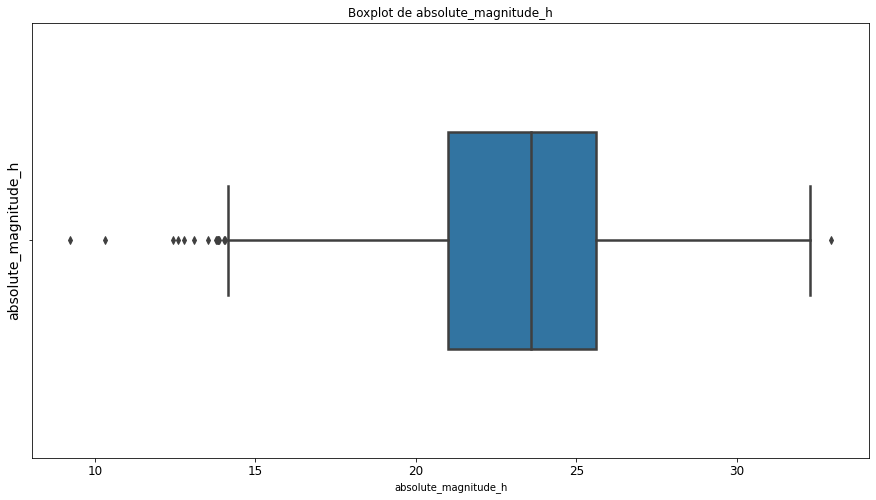

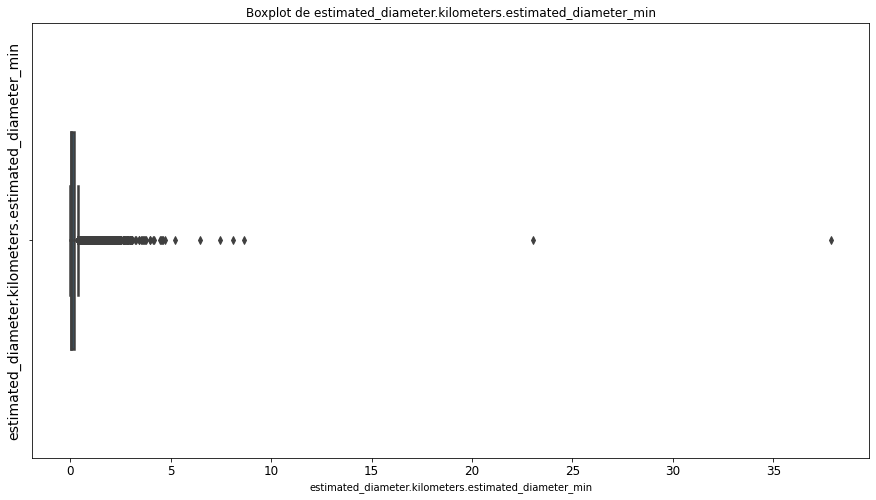

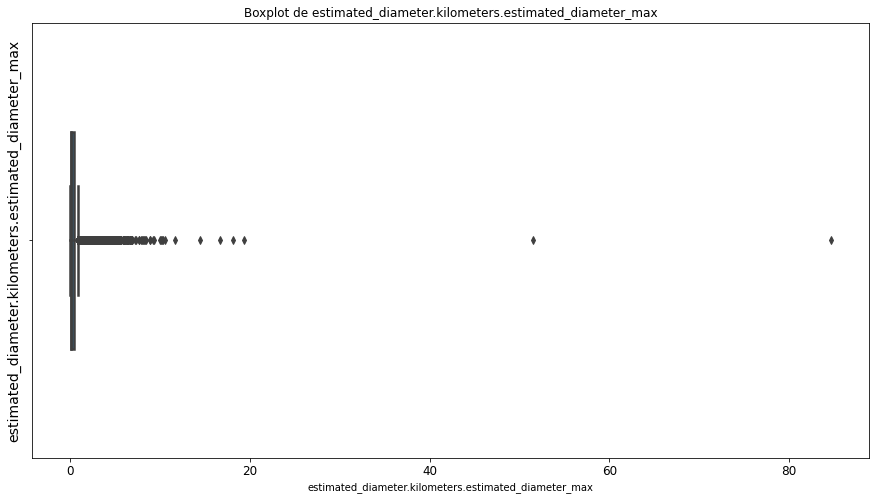

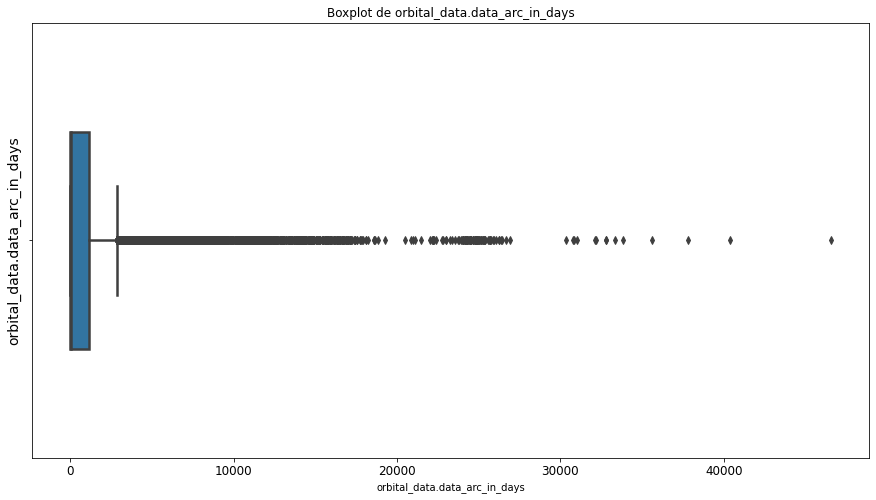

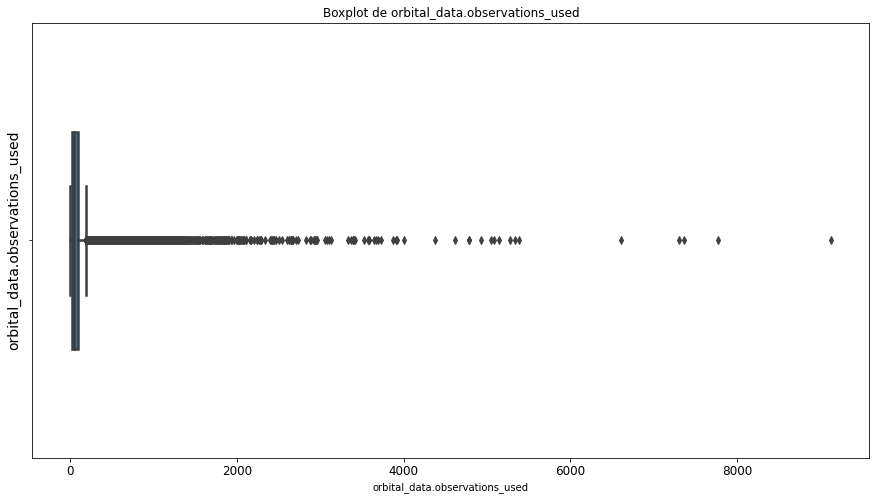

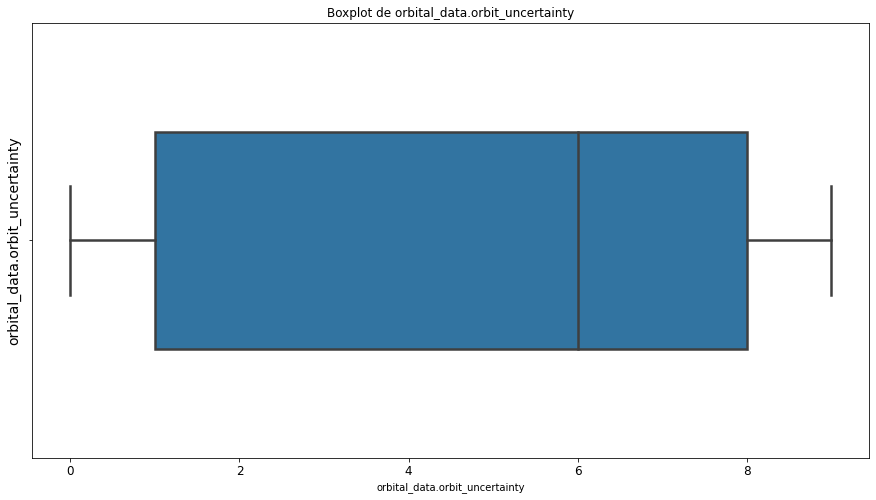

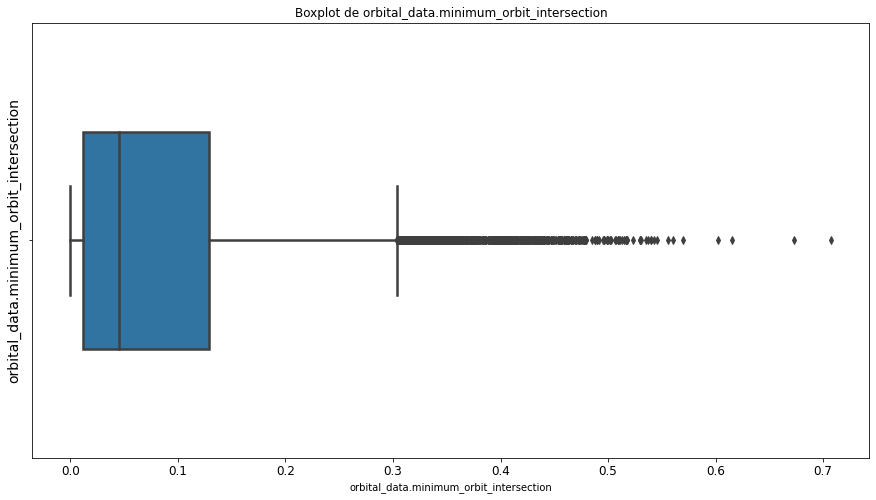

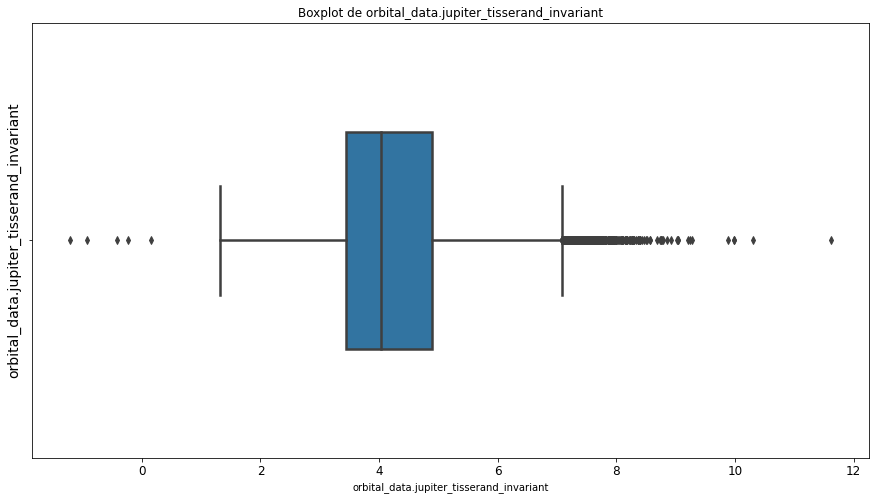

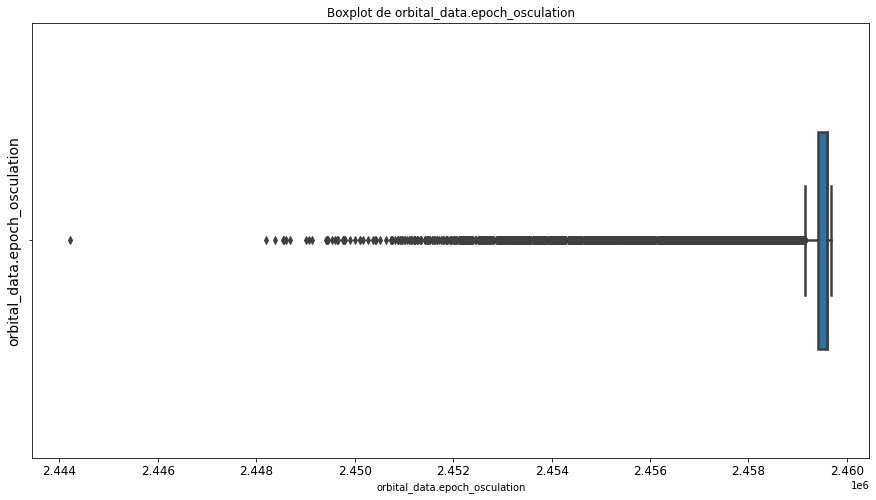

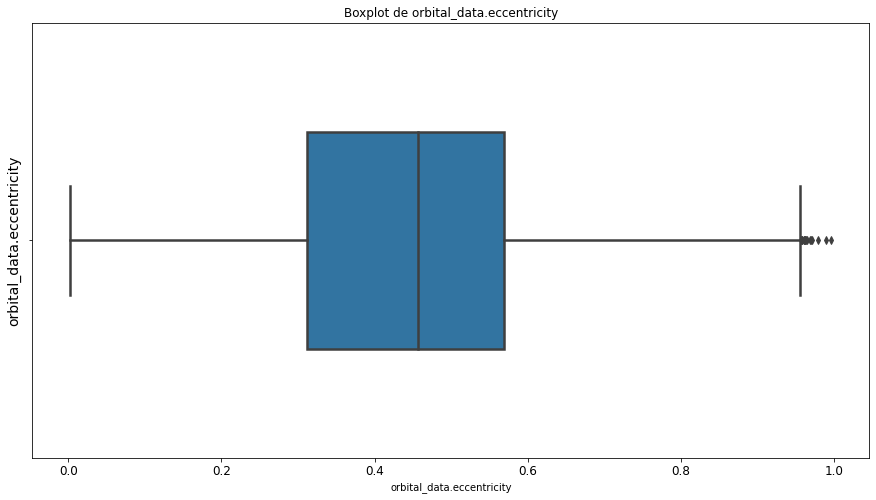

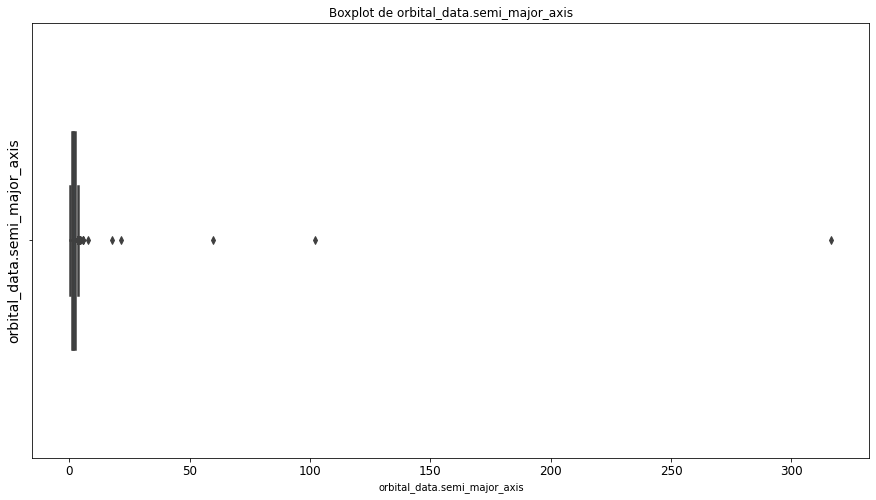

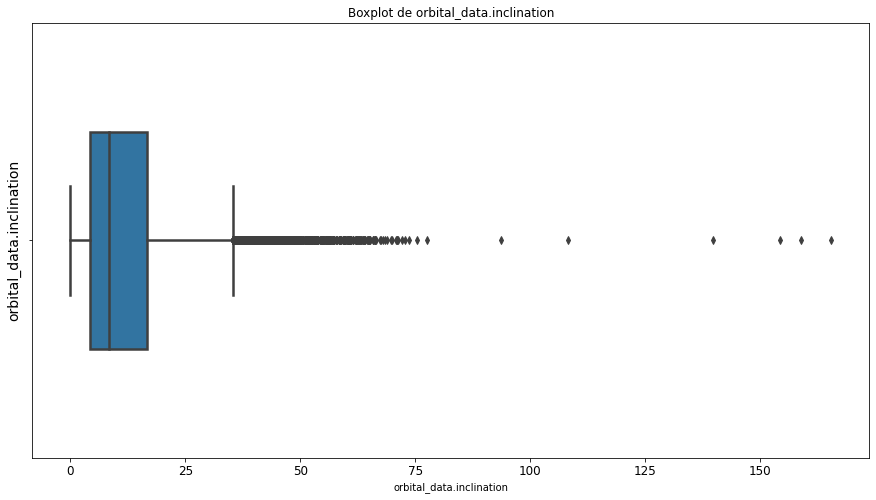

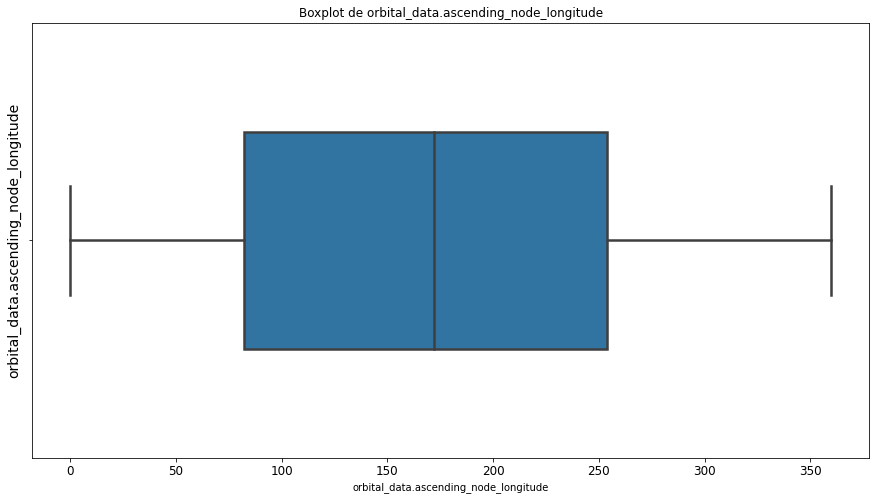

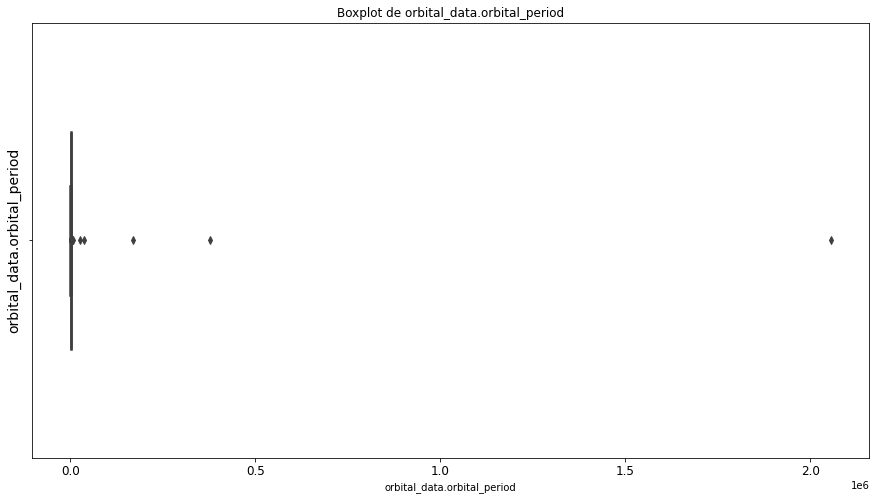

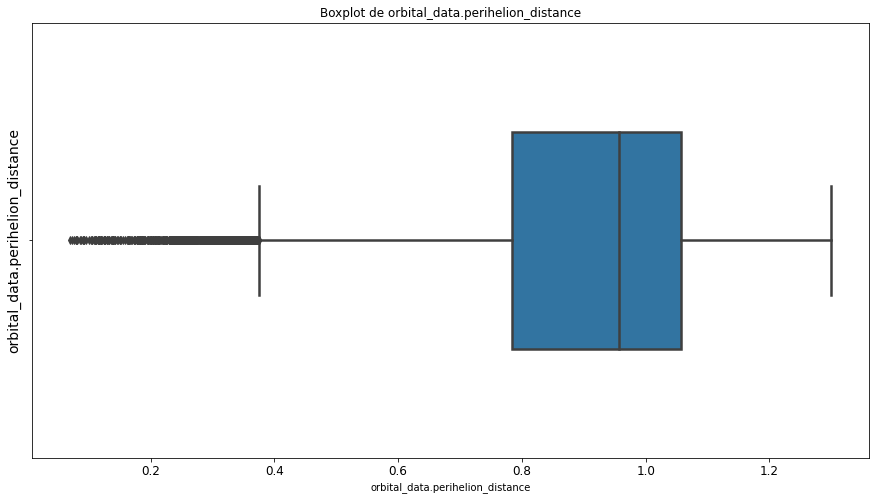

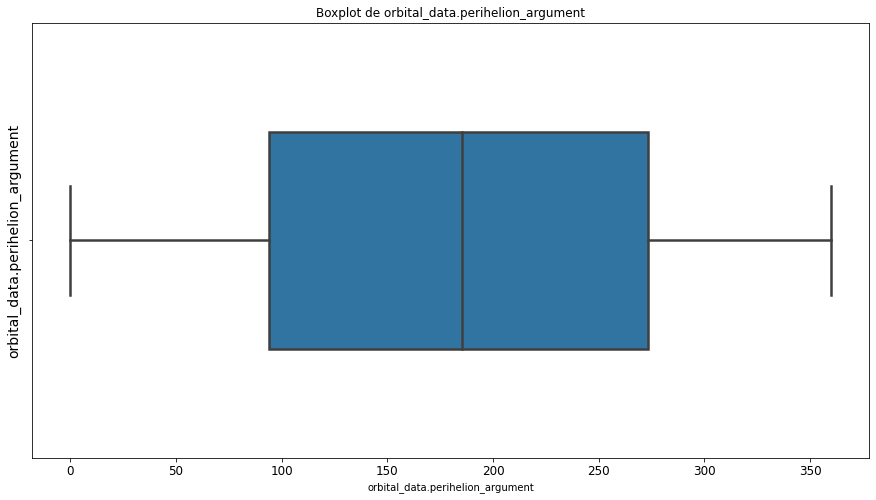

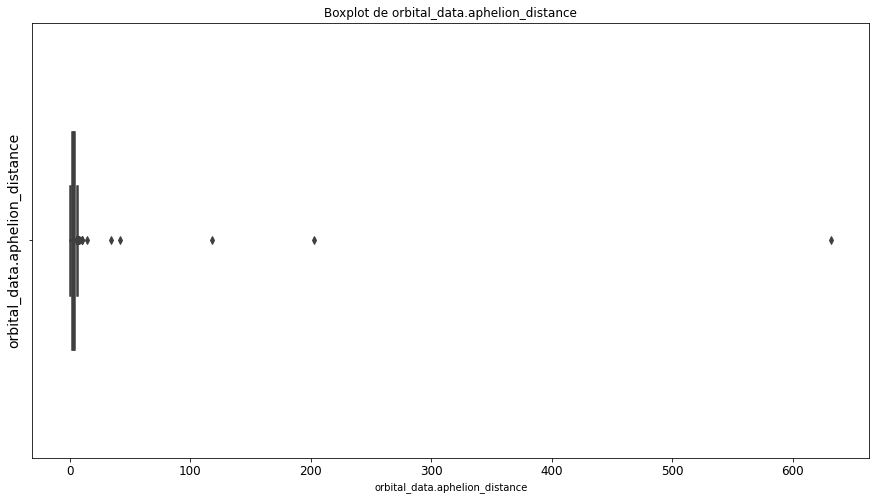

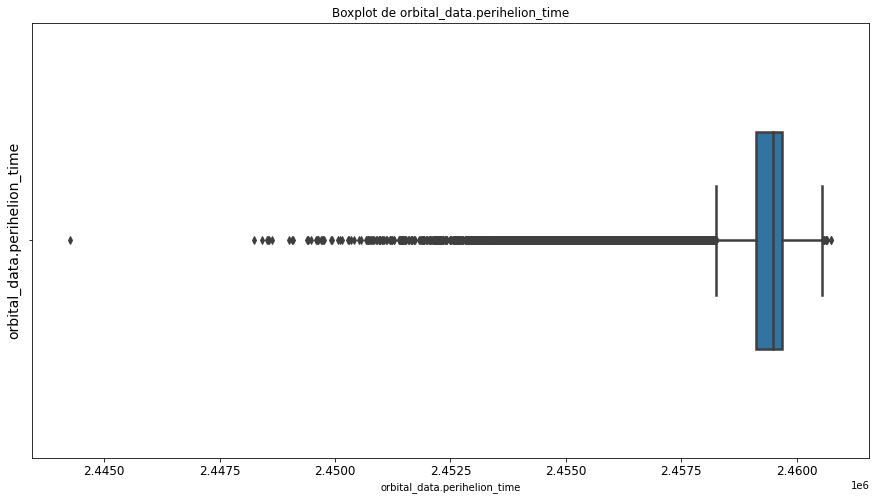

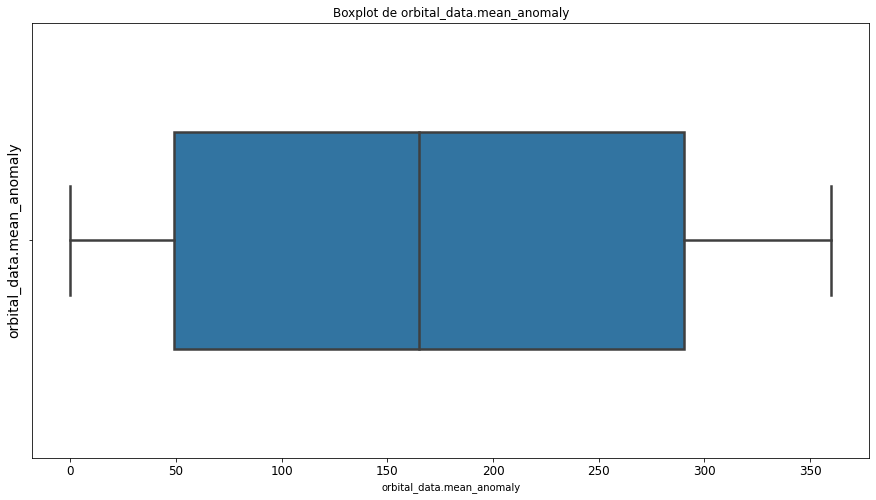

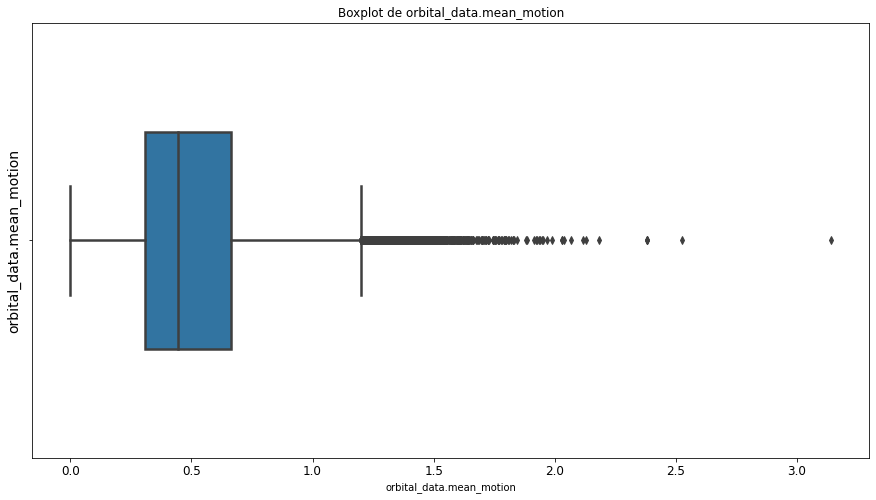

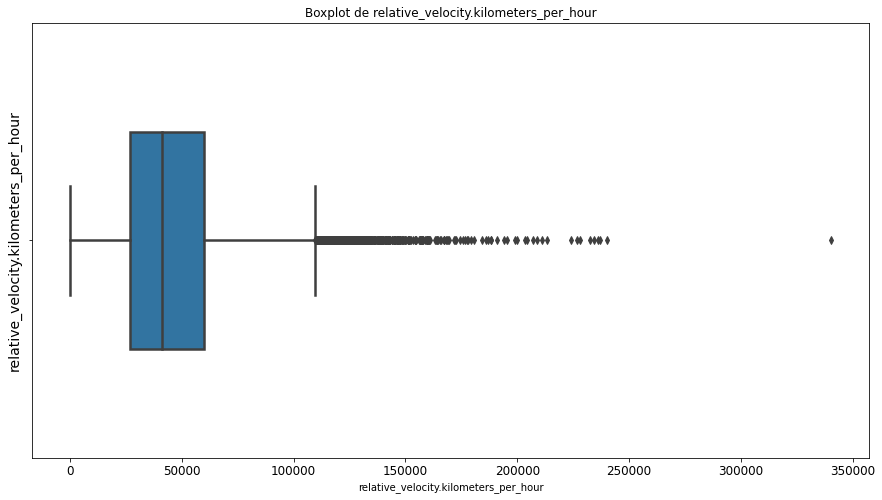

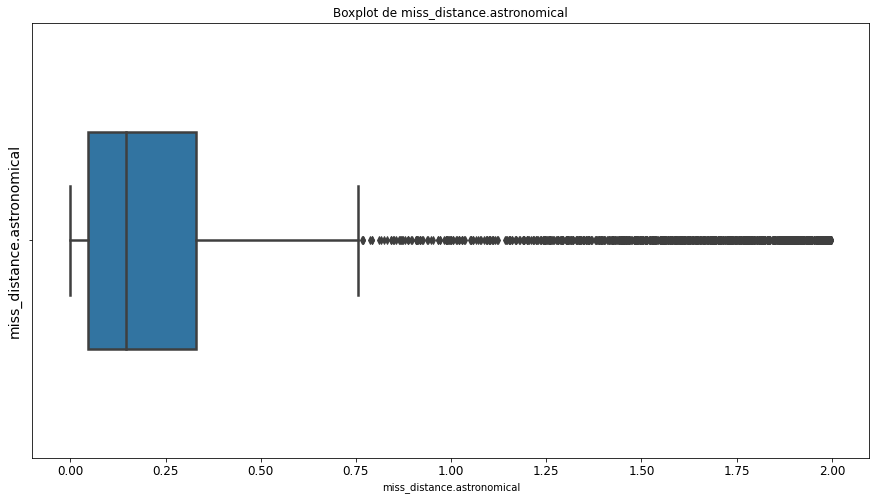

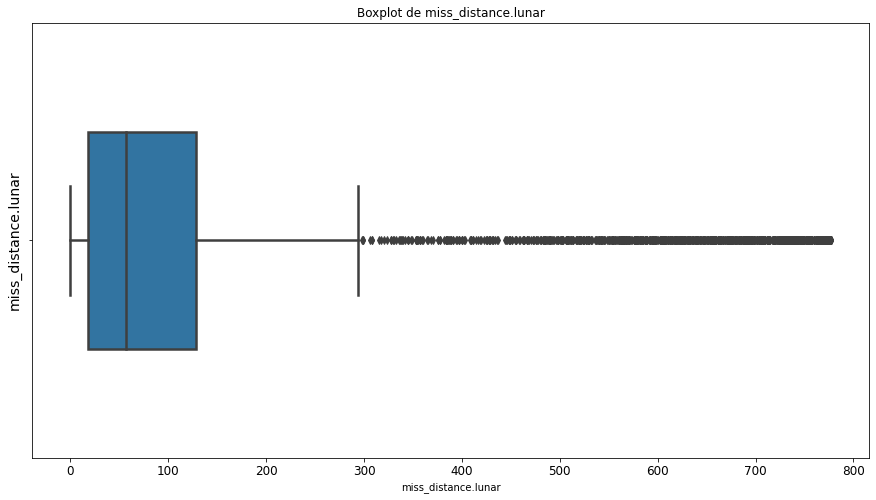

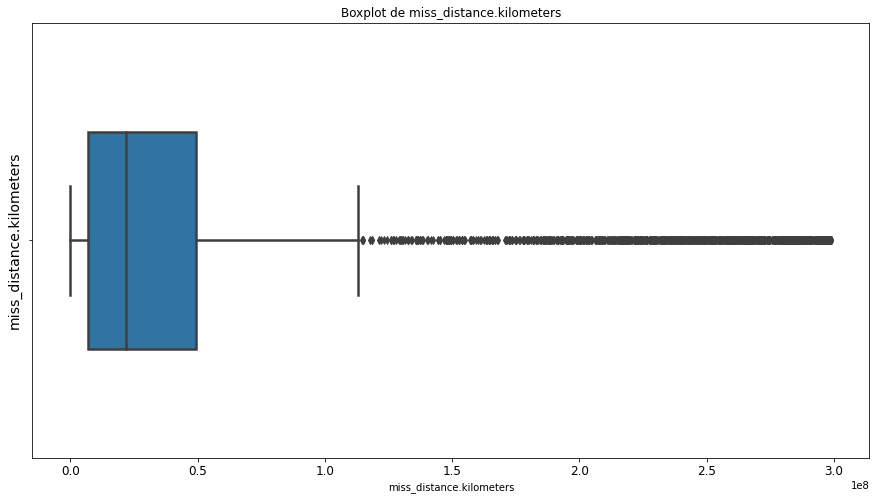

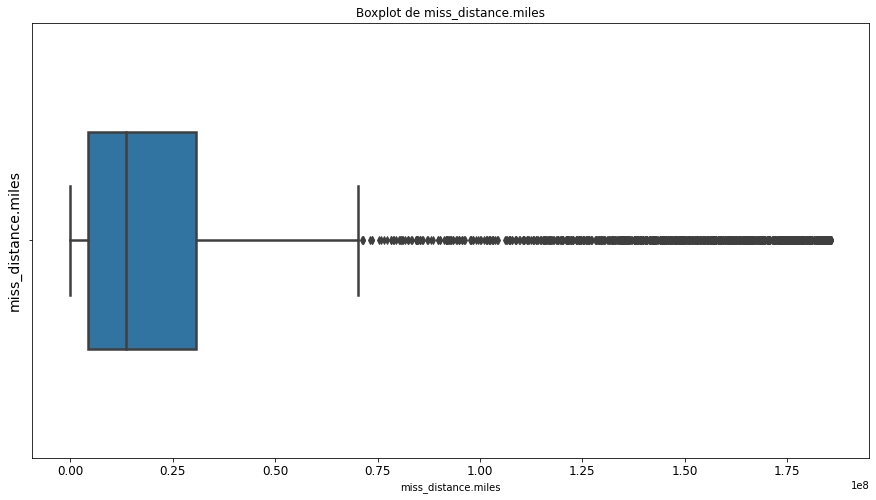

In [24]:
# Analizamos los outliers del dataset en las variables numericas utilizando un bucle que cree un boxplot para cada columna

for col in data_new.columns[data_new.dtypes == 'float64']:
    plt.figure(figsize=(15, 8))
    sns.boxplot(data_new[col], width=0.5, linewidth=2.5)
    plt.title("Boxplot de " + col)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.show()

In [25]:
# Aqui detallamos los puntos del boxplot de cada columna con valores numericos

data_new.describe()

,absolute_magnitude_h,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,orbital_data.data_arc_in_days,orbital_data.observations_used,orbital_data.orbit_uncertainty,orbital_data.minimum_orbit_intersection,orbital_data.jupiter_tisserand_invariant,orbital_data.epoch_osculation,orbital_data.eccentricity,...,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
count,29540.000000,29540.000000,29540.000000,29540.000000,29540.000000,29540.000000,2.954000e+04,29540.000000,2.954000e+04,29540.000000,...,29540.000000,29540.000000,2.954000e+04,29540.000000,29540.000000,29540.000000,29540.000000,29540.000000,2.954000e+04,2.954000e+04
mean,23.334406,0.149919,0.335229,1362.216317,106.581720,5.102539,8.497684e-02,4.267687,2.458997e+06,0.441987,...,183.001243,2.624497,2.458990e+06,171.478636,0.523265,45838.765347,0.229053,89.101605,3.426584e+07,2.129180e+07
std,2.989935,0.383139,0.856724,3021.720911,255.796618,3.194574,9.727485e-02,1.068783,1.434102e+03,0.176664,...,104.253700,4.050940,1.454286e+03,122.008234,0.281611,25935.722948,0.299017,116.317633,4.473231e+07,2.779537e+07
min,9.230000,0.000683,0.001528,1.000000,4.000000,0.000000,1.822910e-07,-1.205000,2.444222e+06,0.002846,...,0.015175,0.653754,2.444268e+06,0.004689,0.000175,203.346433,0.000062,0.024227,9.316925e+03,5.789269e+03
25%,21.000000,0.020163,0.045086,7.000000,27.000000,1.000000,1.173570e-02,3.437000,2.459416e+06,0.311056,...,94.070033,1.690477,2.459114e+06,49.093041,0.307174,26743.493425,0.046088,17.928125,6.894626e+06,4.284122e+06
50%,23.600000,0.050647,0.113250,26.000000,46.000000,6.000000,4.498700e-02,4.026000,2.459600e+06,0.456310,...,185.251872,2.465430,2.459487e+06,164.771411,0.443529,40956.285880,0.145132,56.456374,2.171145e+07,1.349087e+07
75%,25.600000,0.167708,0.375008,1143.000000,91.000000,8.000000,1.285755e-01,4.894000,2.459600e+06,0.569050,...,273.337674,3.368592,2.459691e+06,290.424552,0.664120,59921.121022,0.330280,128.479058,4.940924e+07,3.070148e+07
max,32.950000,37.892650,84.730541,46582.000000,9130.000000,9.000000,7.076340e-01,11.624000,2.459682e+06,0.996069,...,359.997395,631.895456,2.460749e+06,359.999892,3.141393,340456.148705,1.998513,777.421423,2.989732e+08,1.857734e+08


In [26]:
# Creamos una funcion que permita crear un boxplot de la columna que le pasemos como argumento

def create_boxplot(dataframe, column_name):
    data = dataframe[column_name]
    sns.boxplot(x=data)
    plt.title(f"Boxplot of {column_name}")
    plt.xlabel(column_name)
    plt.show()

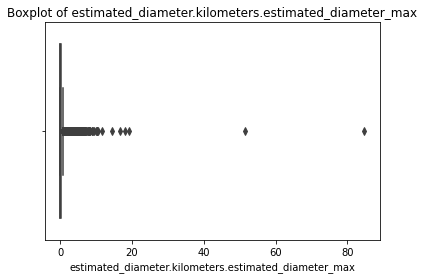

In [27]:
# Llamamos a la funcion y le pasamos una columna

create_boxplot(data_new, "estimated_diameter.kilometers.estimated_diameter_max")

Una técnica que puede utilizarse para reducir el efecto de los outliers en el análisis podría ser la normalización, ya que tenemos demasiados y eliminarlos a todos o imputarles otros valores afectaría a los datos y por consecuencia al análisis.

#### B) Análisis de frecuencias y distribuciones

In [28]:
# Analizamos ahora las variables object y bool

columns_object = ['is_potentially_hazardous_asteroid','is_sentry_object',
                  'orbital_data.equinox','orbital_data.orbit_class.orbit_class_type',
                  'orbital_data.orbit_class.orbit_class_description','orbital_data.orbit_class.orbit_class_range',
                  'orbiting_body']

data_new[columns_object].head()

,is_potentially_hazardous_asteroid,is_sentry_object,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_description,orbital_data.orbit_class.orbit_class_range,orbiting_body
0,False,False,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,Earth
1,False,False,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,Juptr
2,False,False,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,Earth
3,False,False,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,Earth
4,False,False,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,Earth


C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


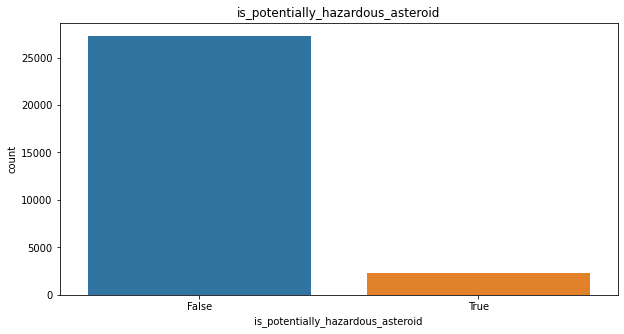

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


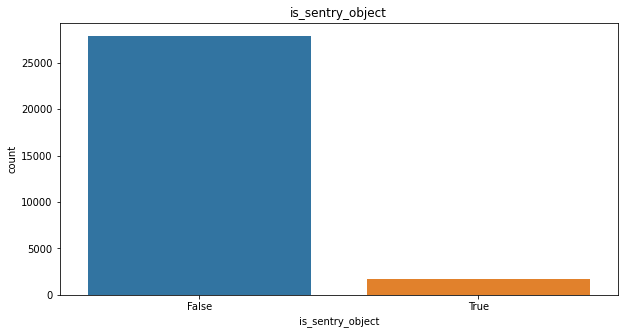

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


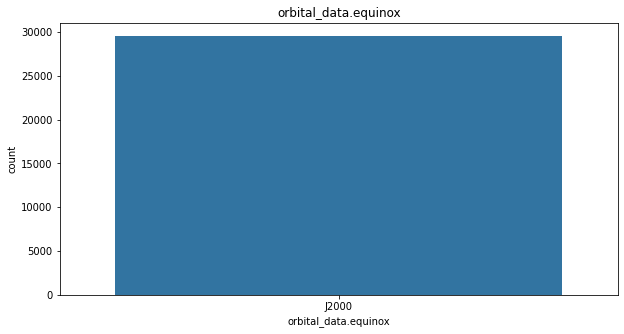

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


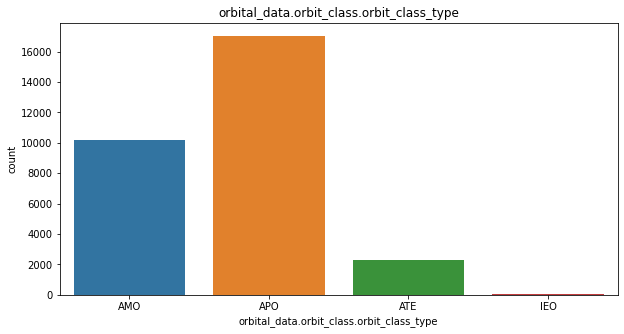

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


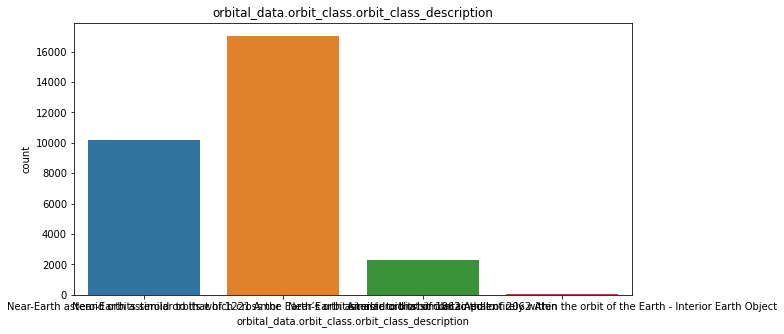

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


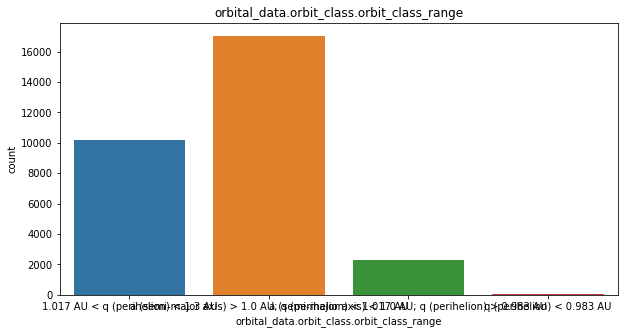

C:\Users\Gustavo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


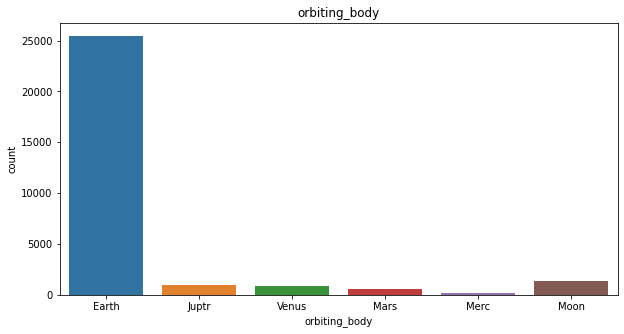

In [29]:
# Con un bucle iteramos en el dataset y creamos un gráfico de barras que muestre la frecuencia de cada variable bool u object

for column in data_new.columns[data_new.columns.isin(columns_object)]:
    if data_new[column].dtype == bool or data_new[column].dtype == object:
        plt.figure(figsize=(10, 5))
        sns.countplot(data_new[column])
        plt.title(column)
        plt.show()

In [30]:
# Creamos una funcion que permita crear un grafico de barras de la columna que le pasemos como argumento

def create_barplot(dataframe, column_name):
    data = dataframe[column_name].value_counts()
    sns.barplot(x=data.index, y=data.values)
    plt.title(f"Barplot of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.show()

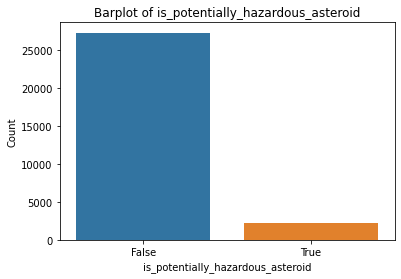

In [31]:
# Llamamos a la funcion y le pasamos una columna

create_barplot(data_new, "is_potentially_hazardous_asteroid")

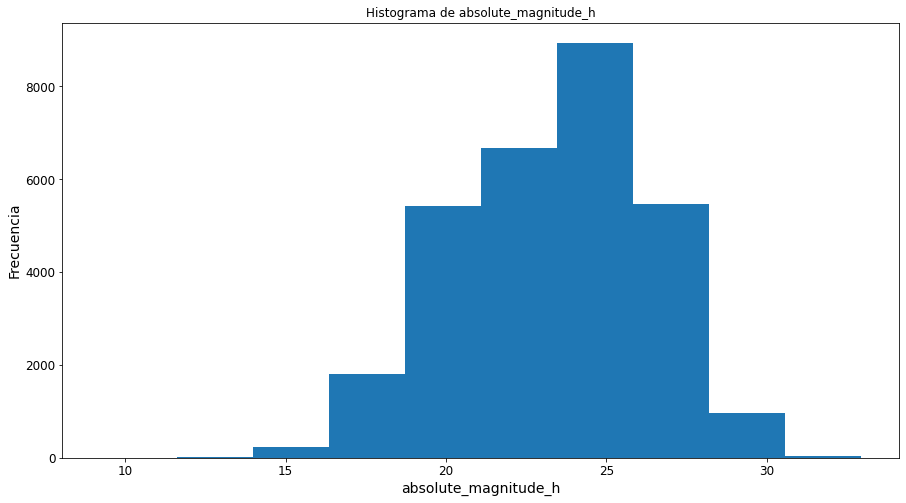

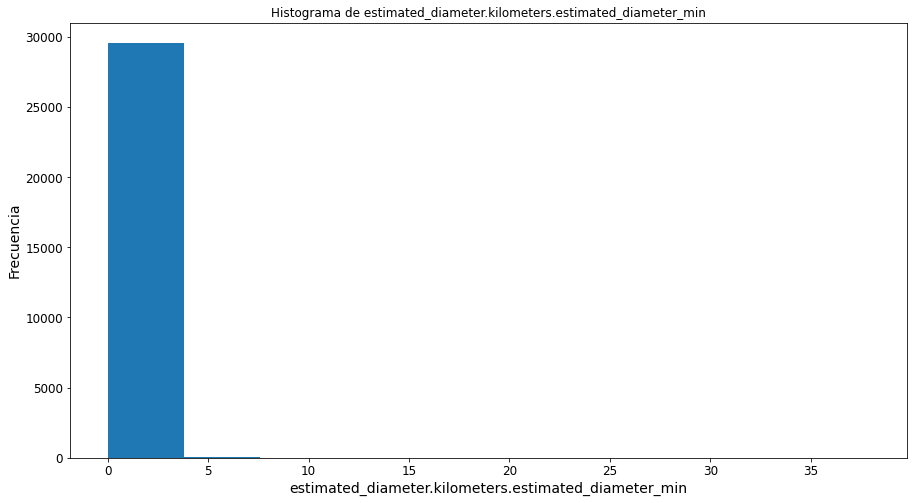

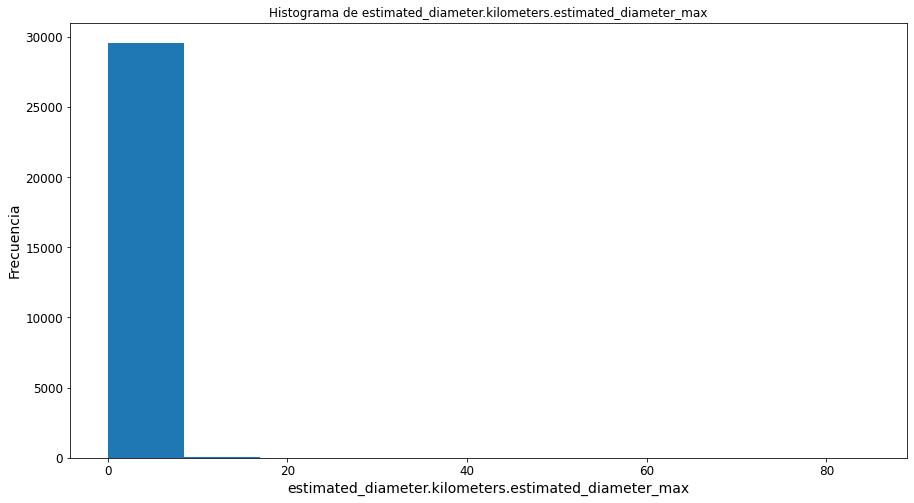

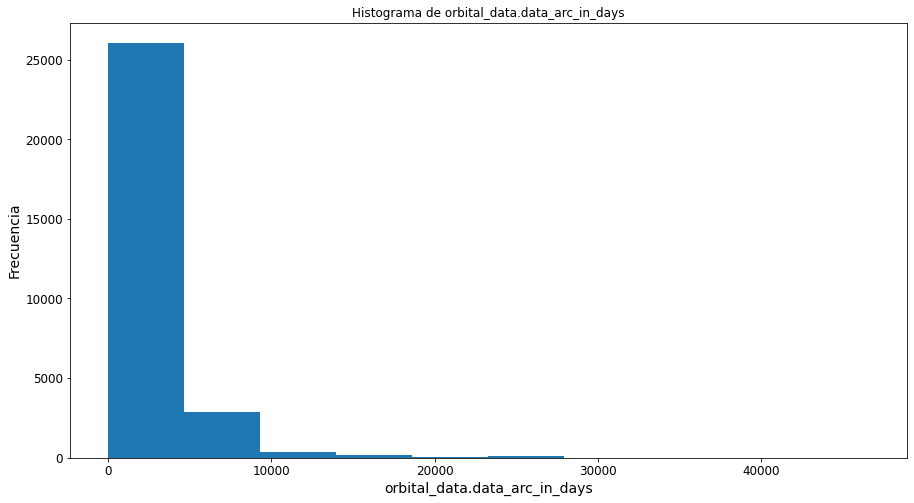

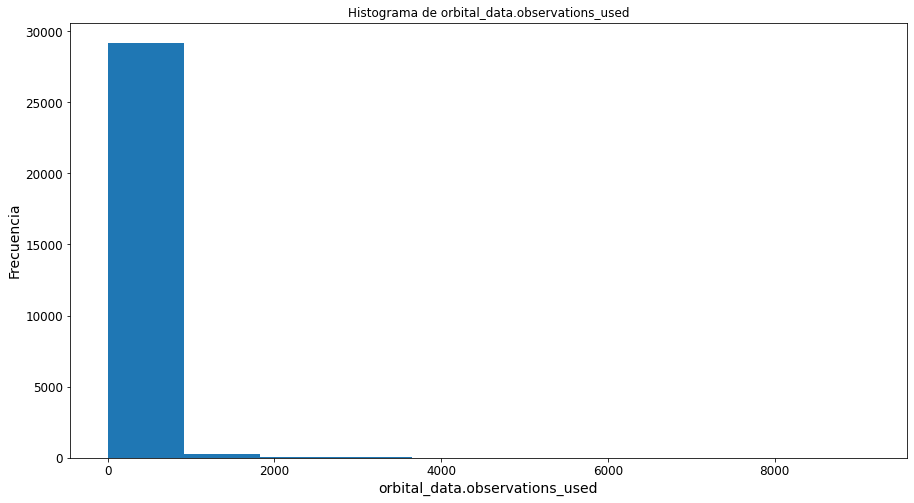

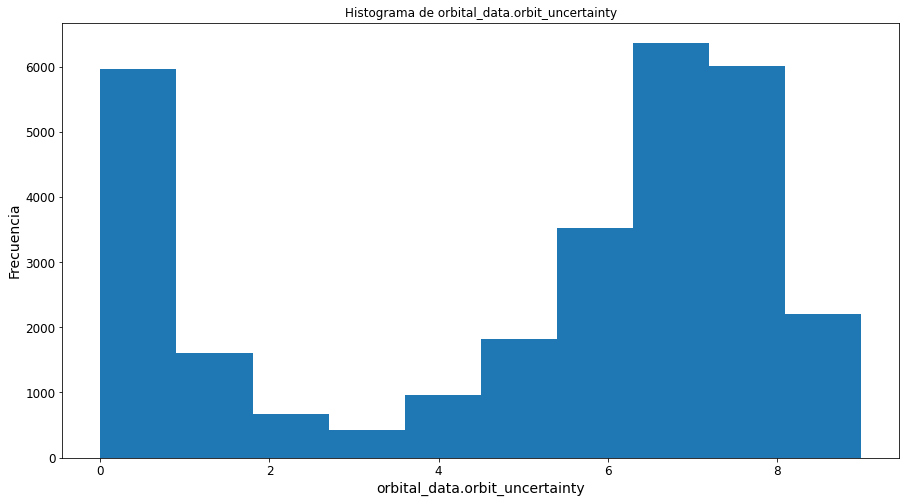

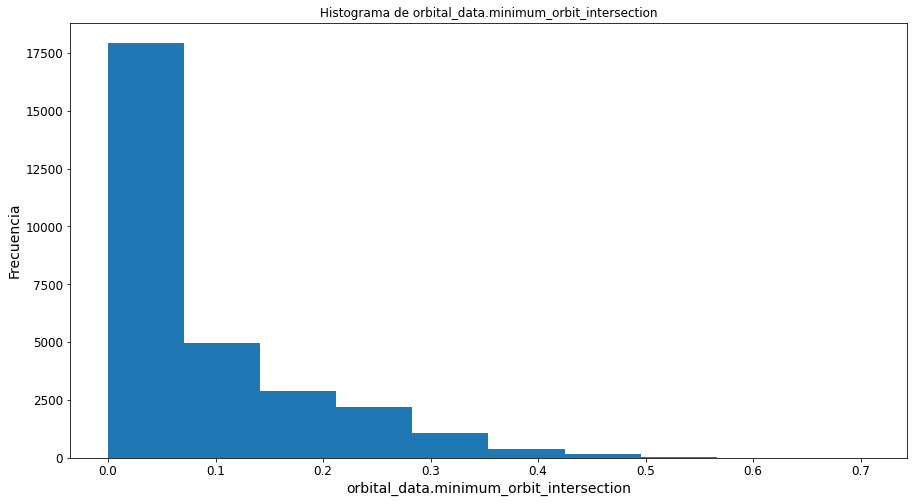

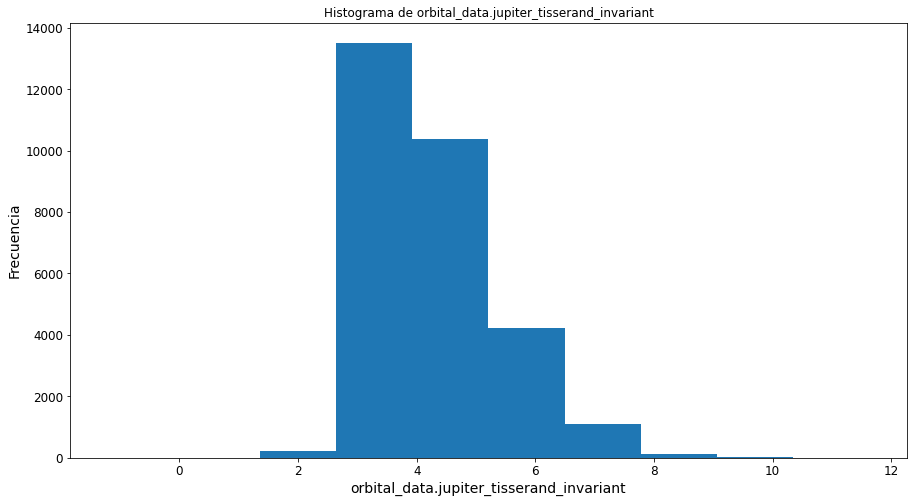

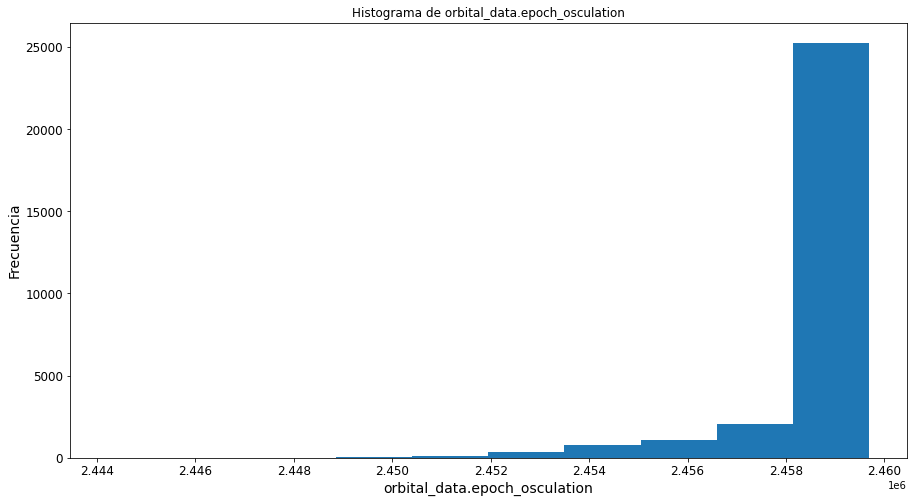

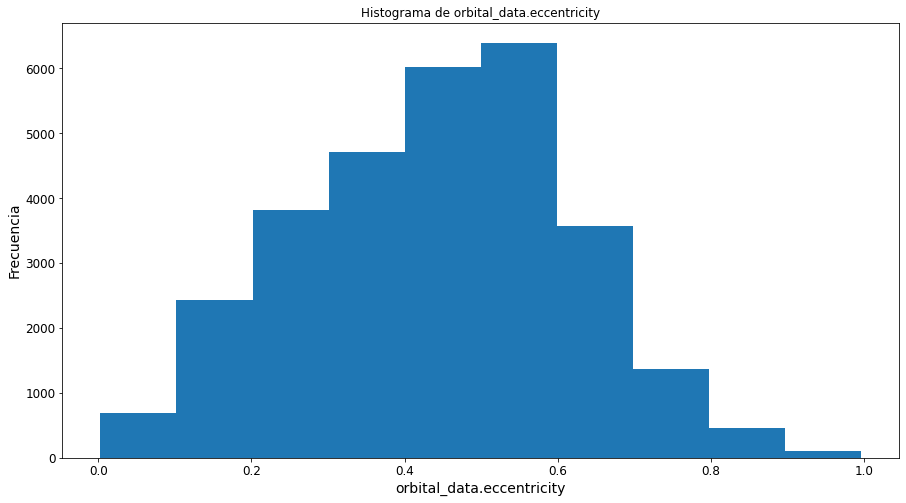

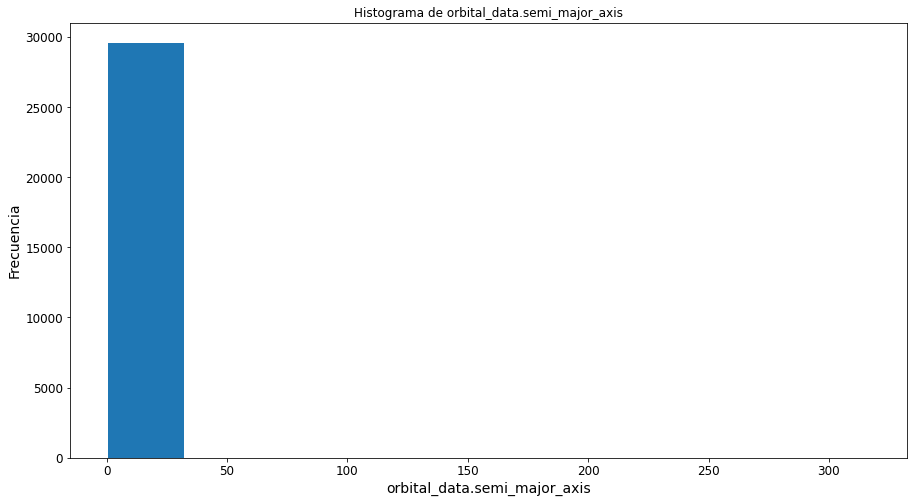

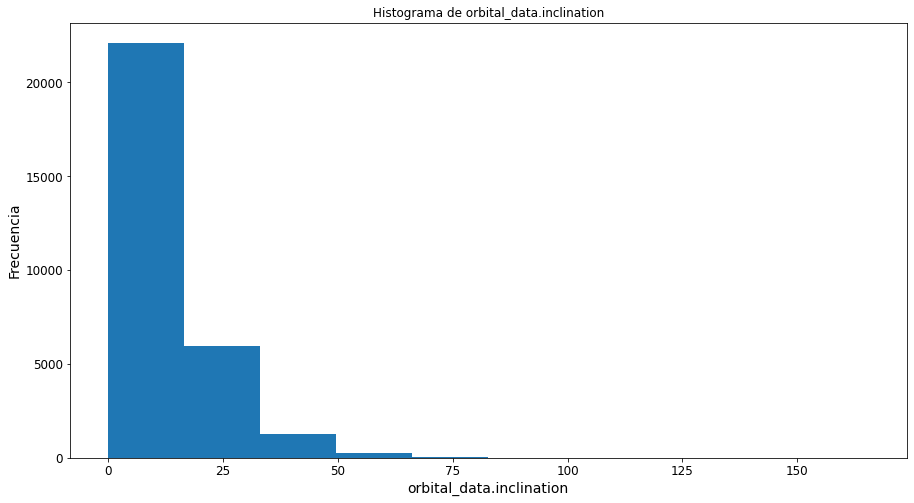

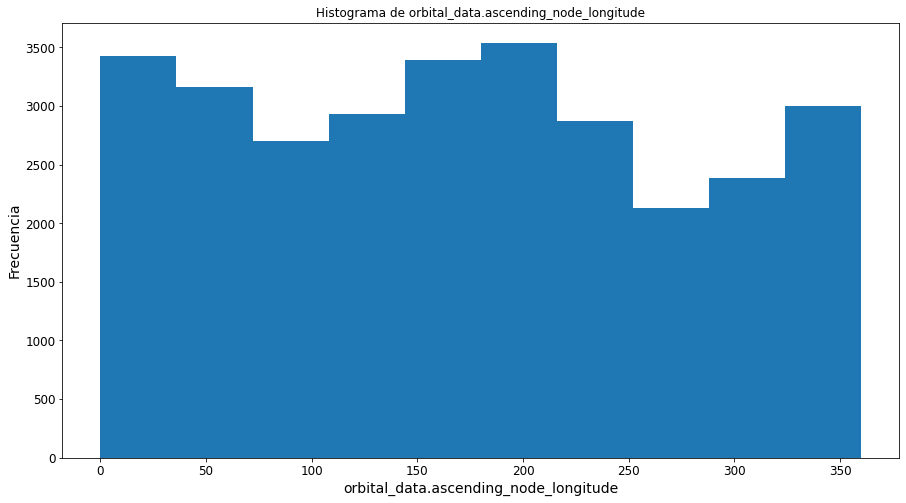

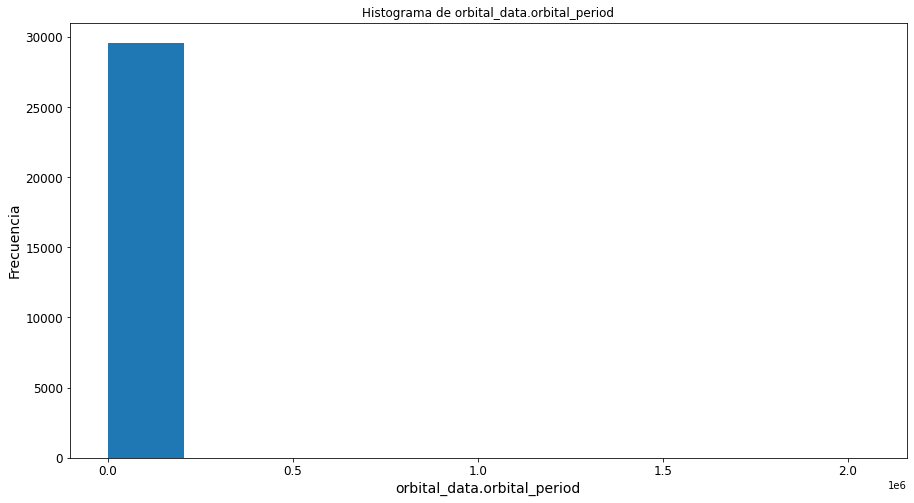

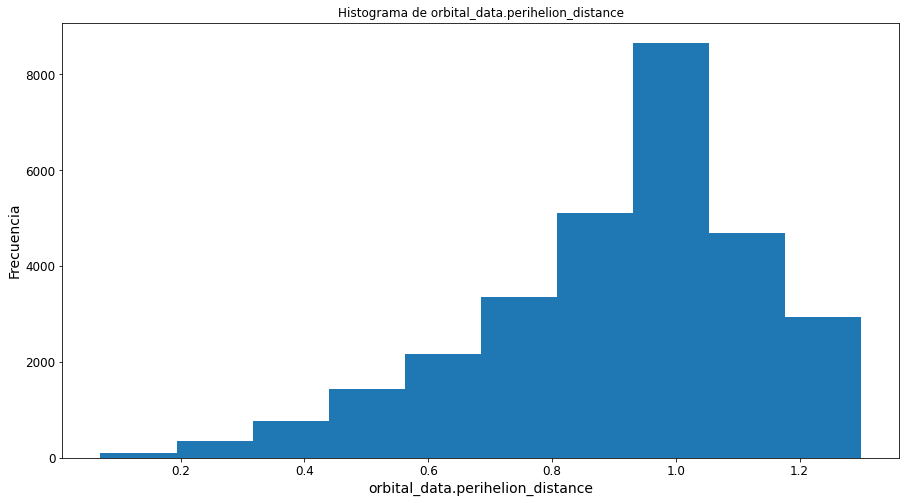

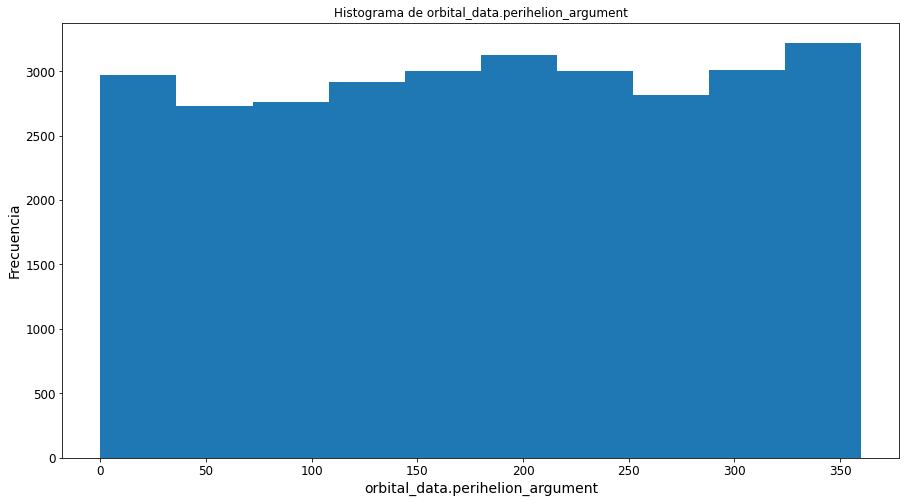

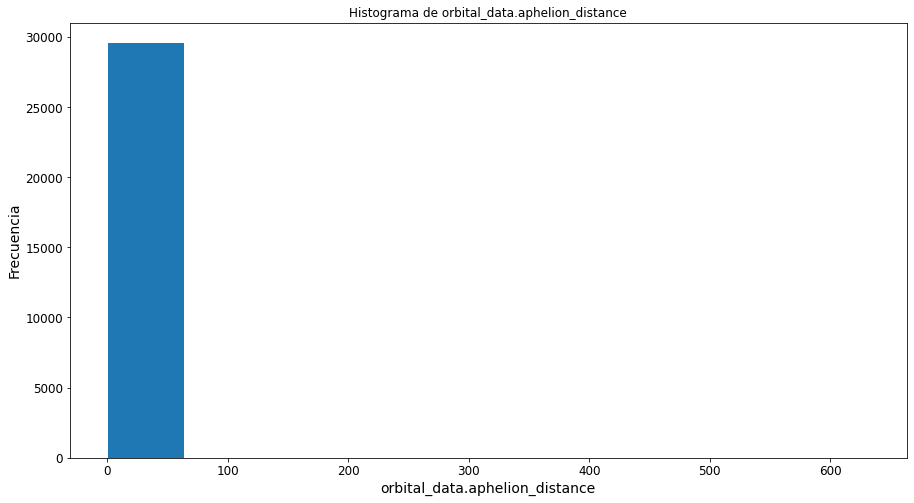

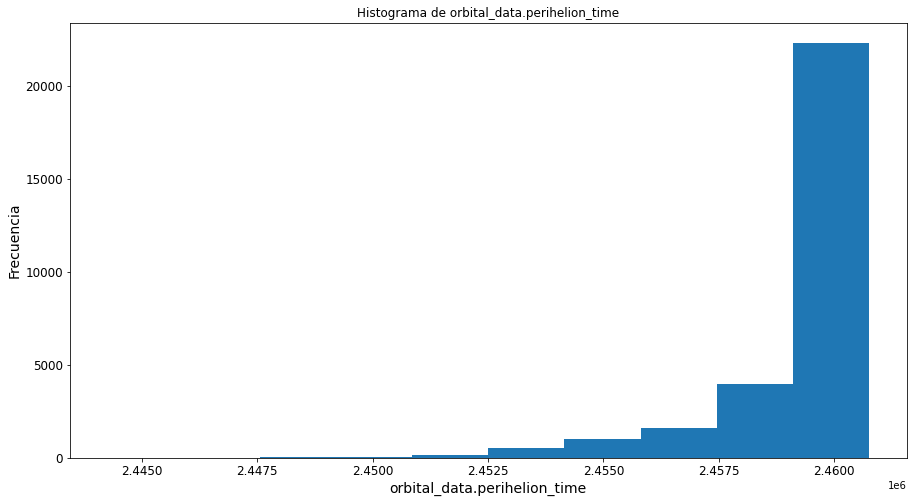

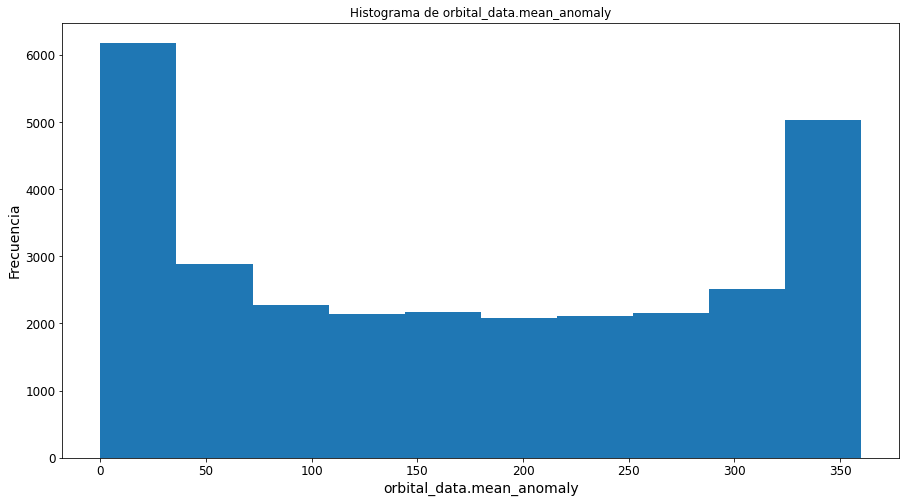

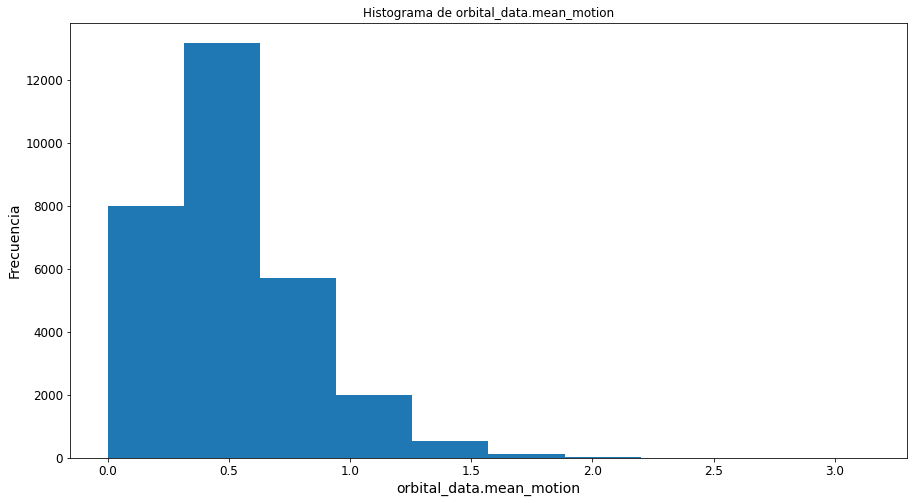

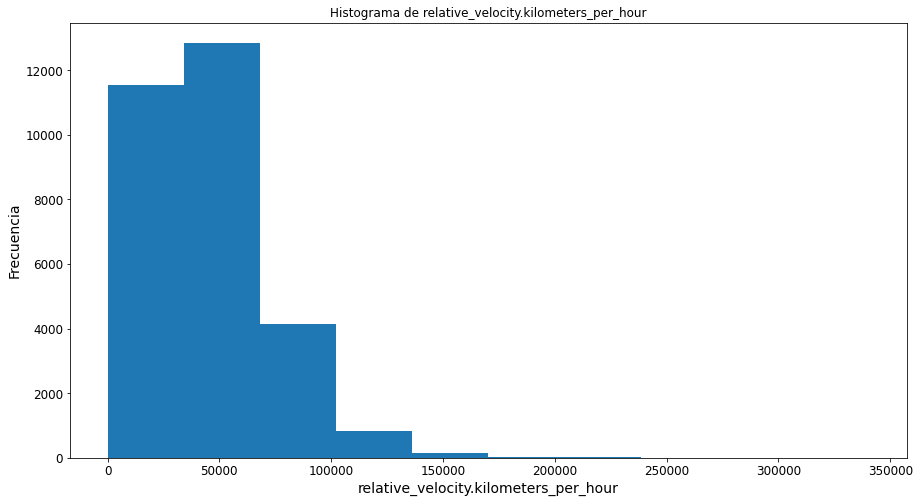

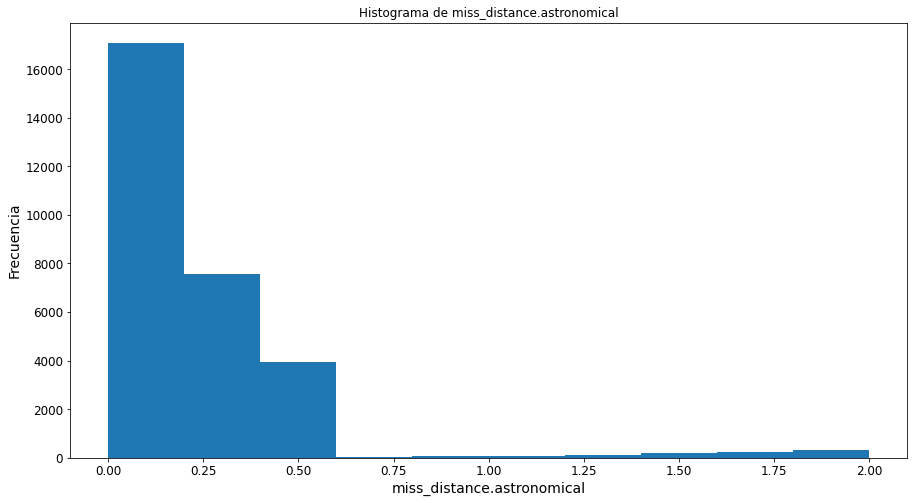

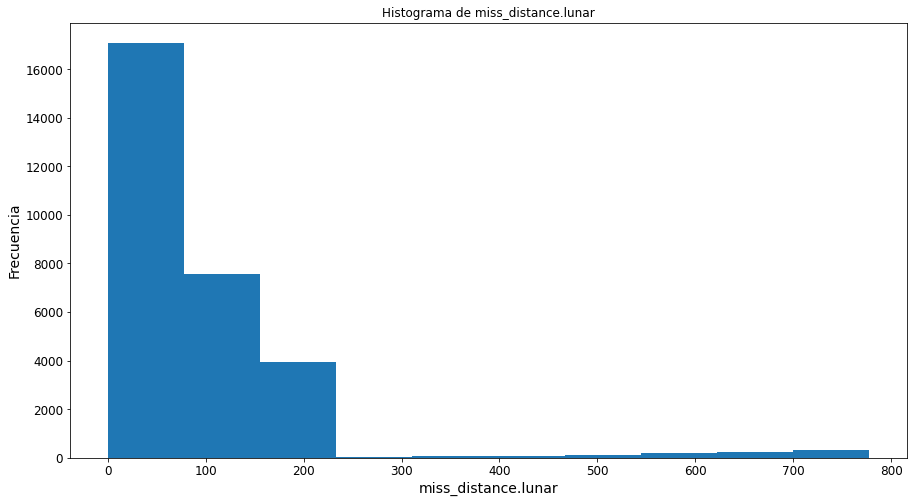

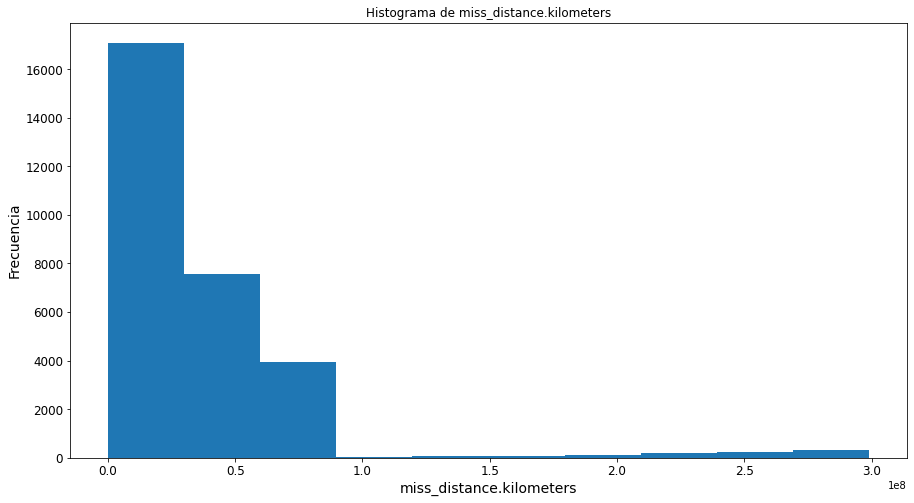

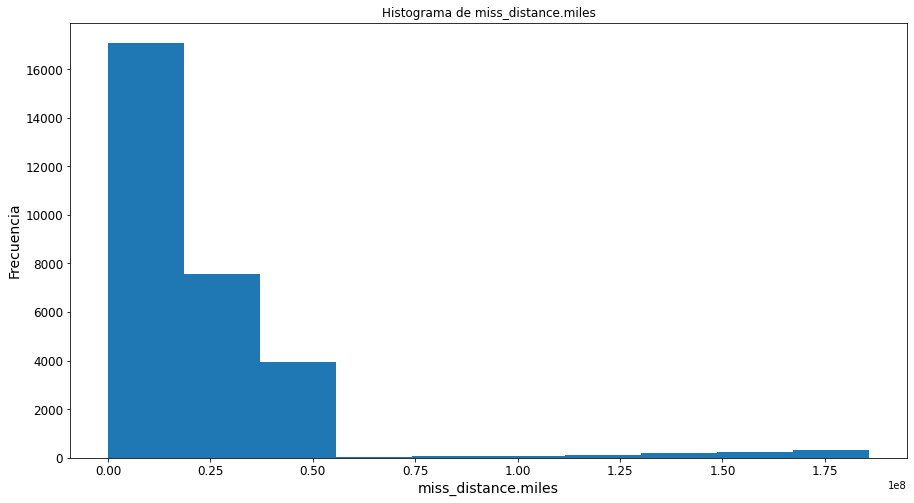

In [32]:
# Observamos ahora la distribucion de las columnas de valores numericos mediante histogramas

for col in data_new.columns[data_new.dtypes == 'float64']:
    plt.figure(figsize=(15, 8))
    plt.hist(data_new[col])
    plt.title("Histograma de " + col)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

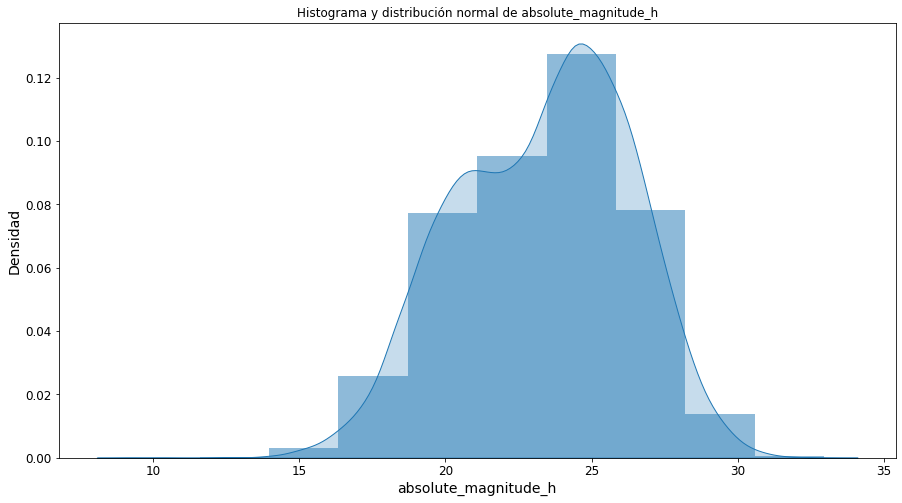

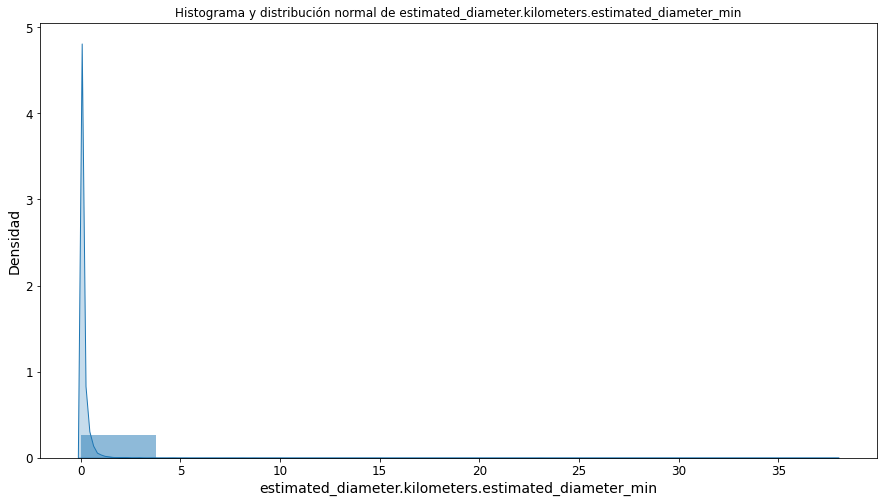

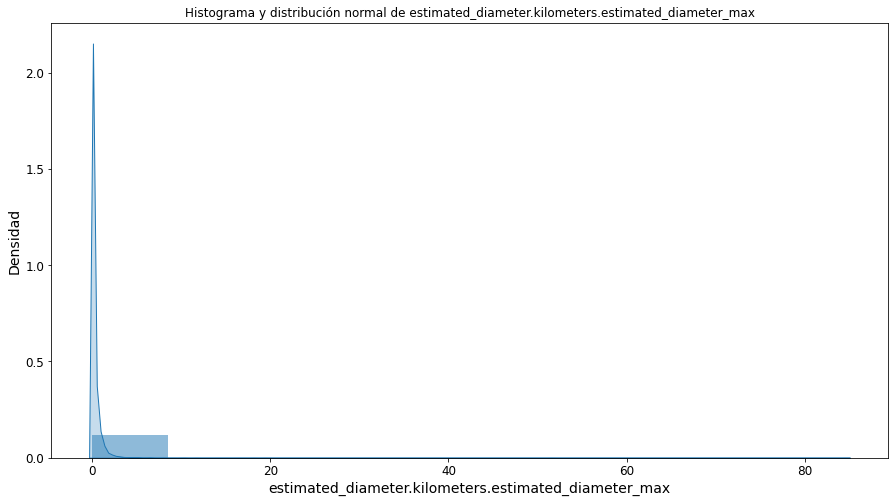

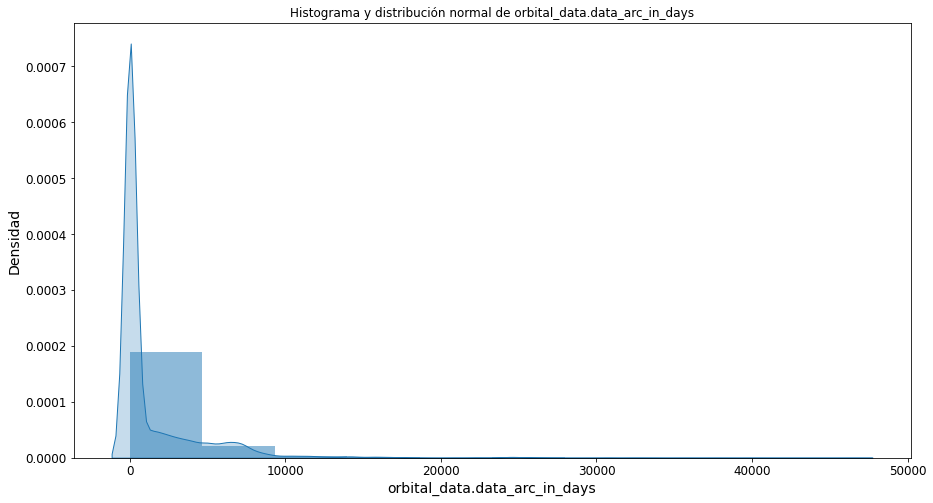

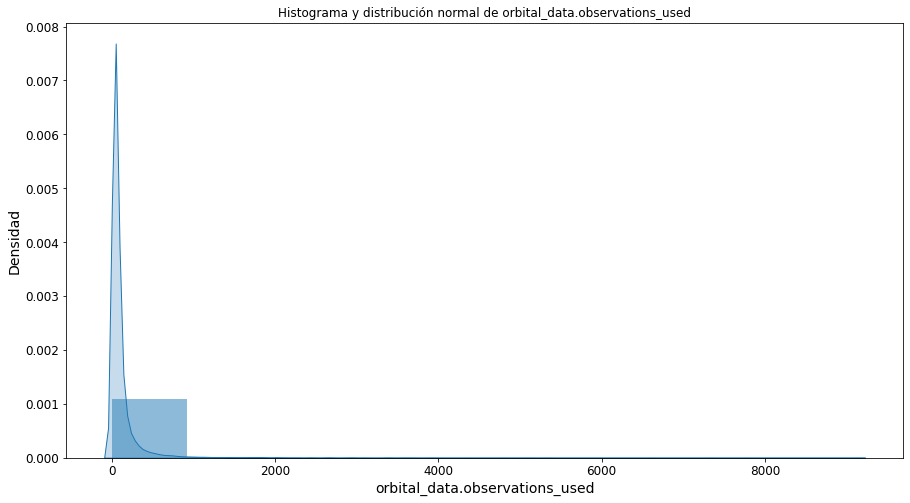

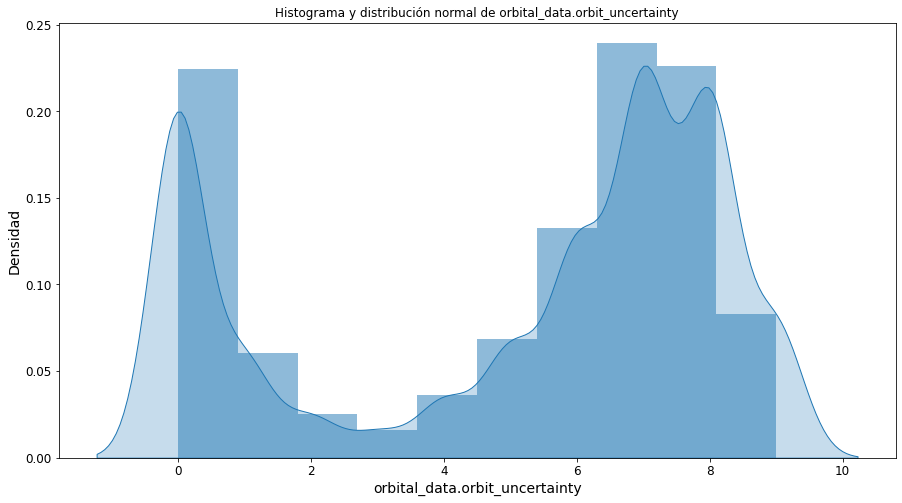

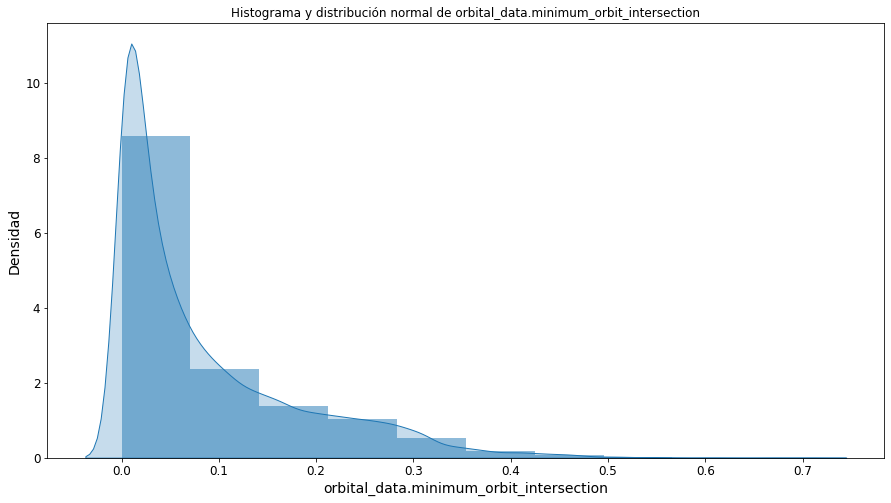

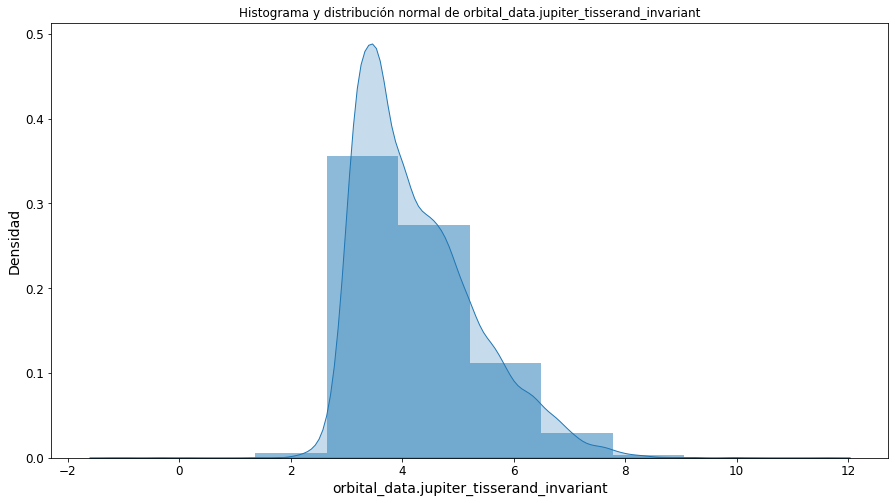

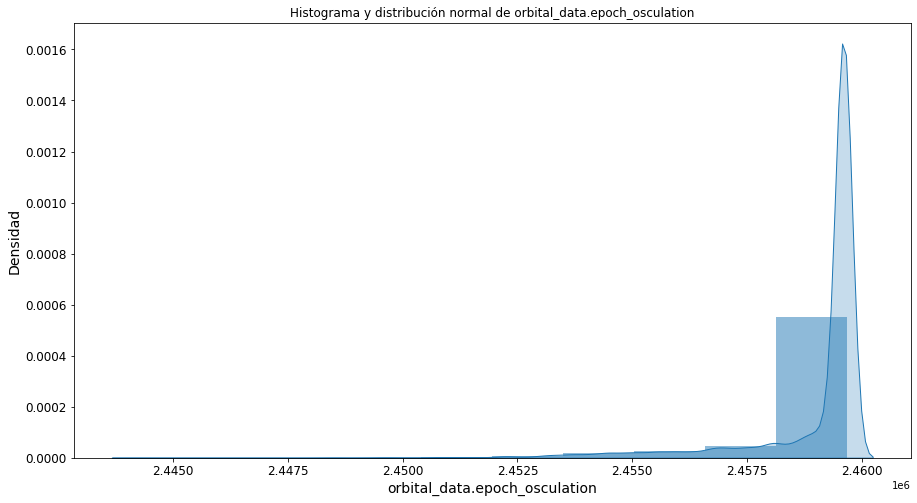

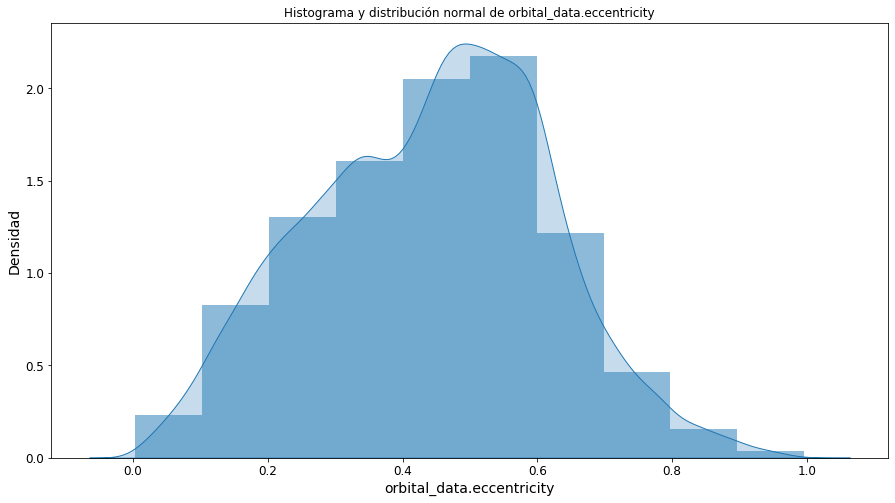

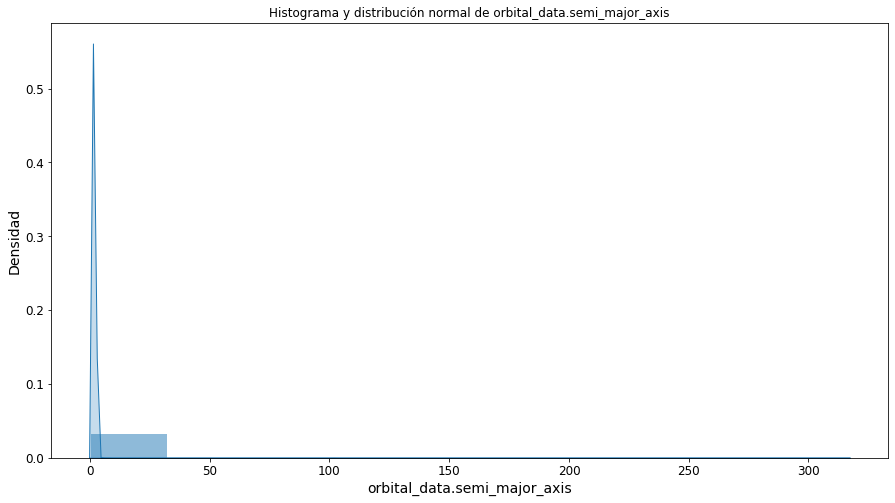

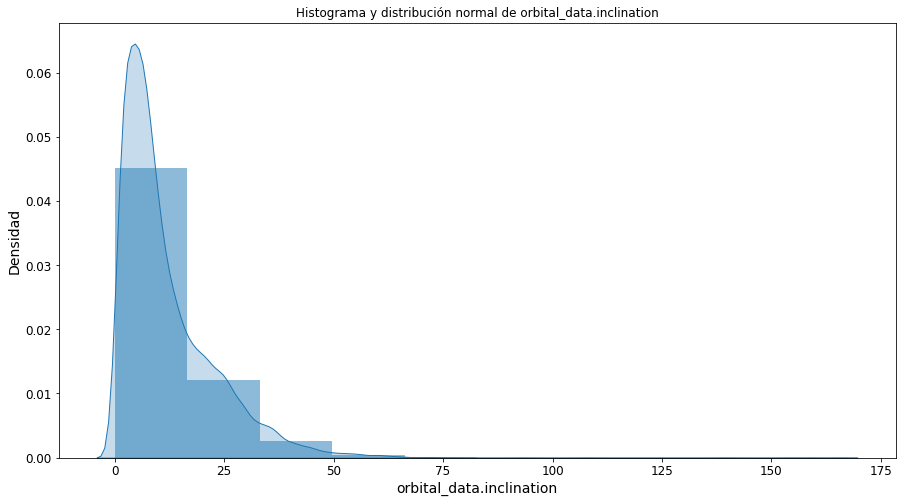

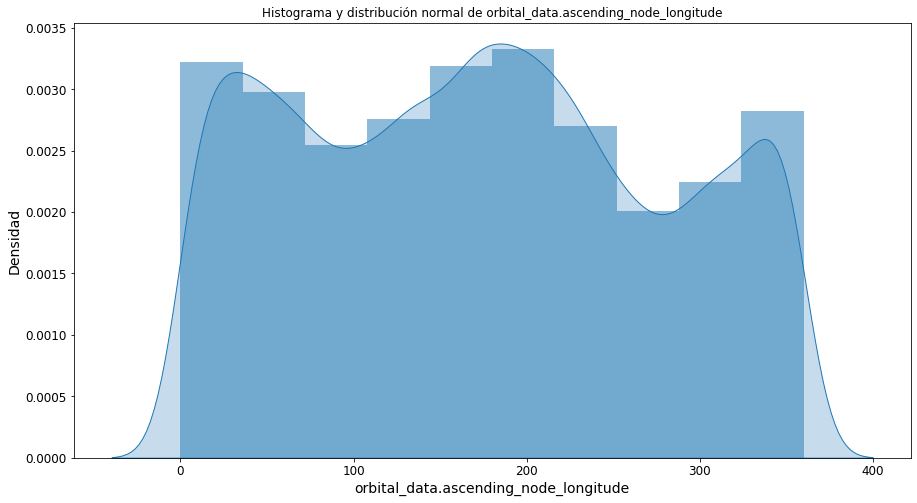

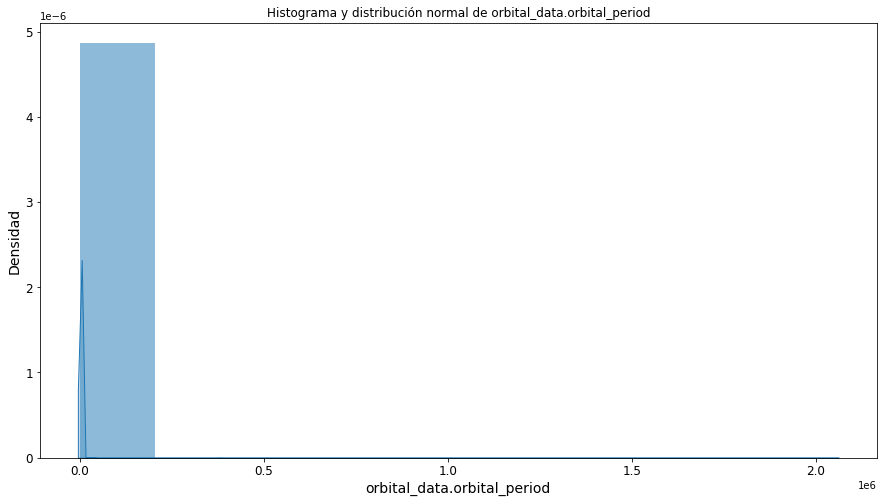

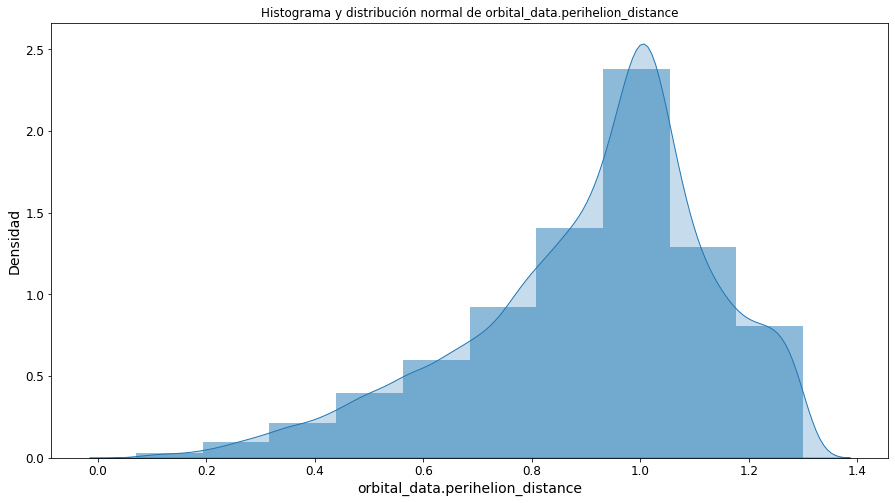

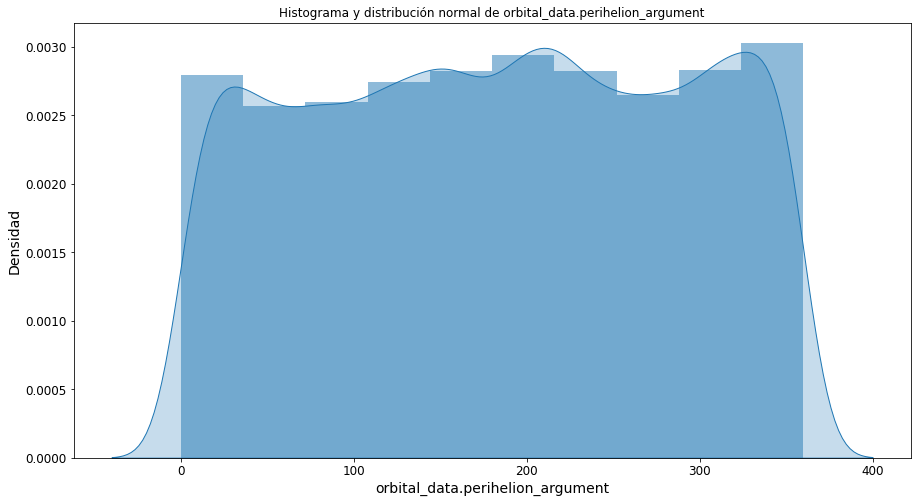

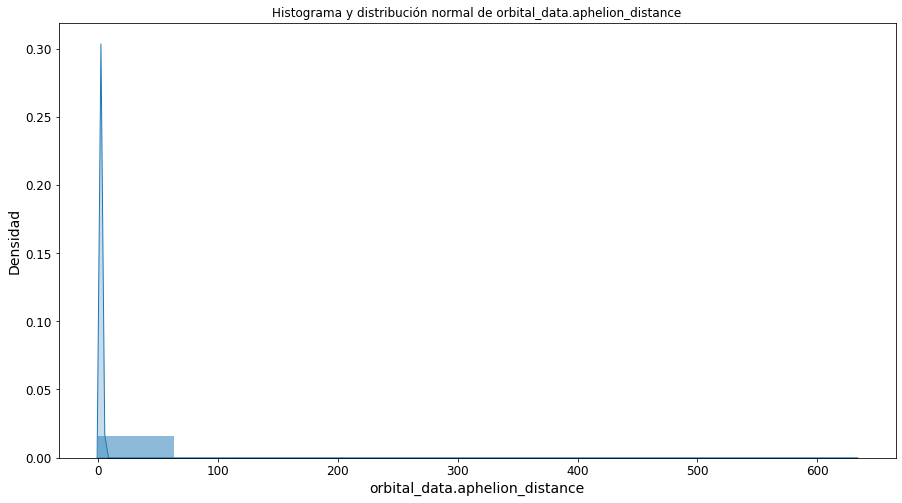

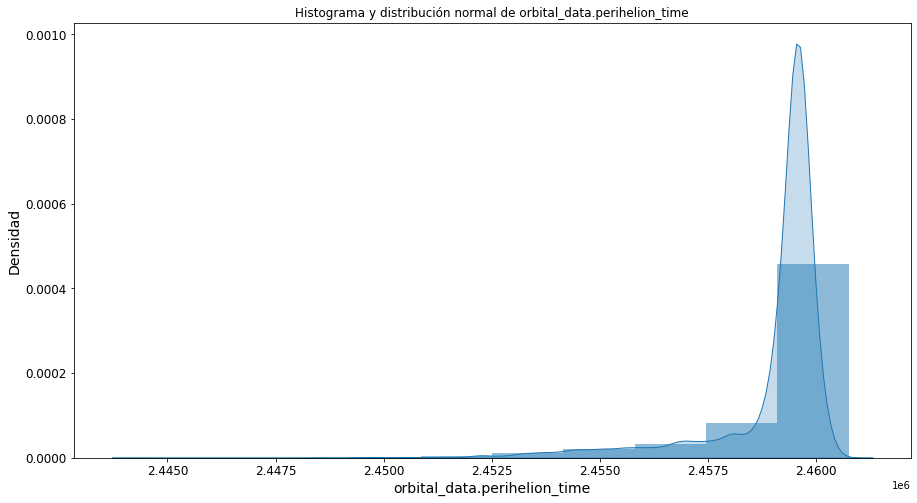

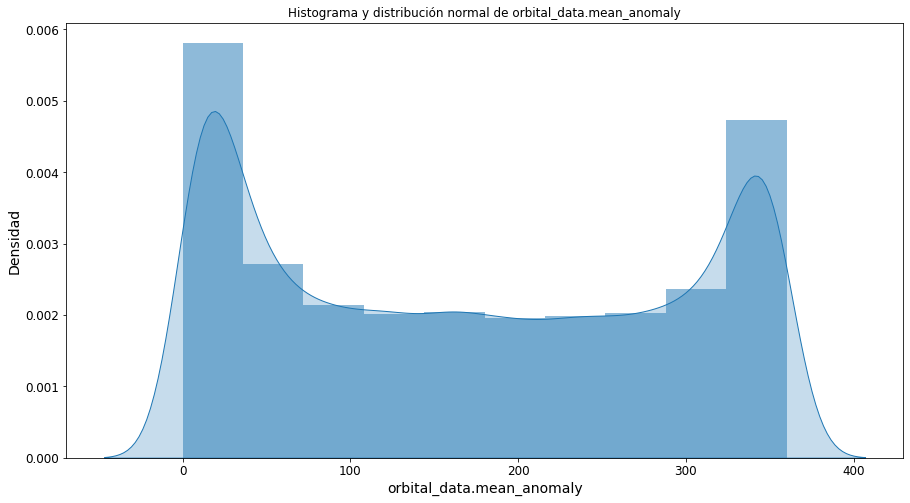

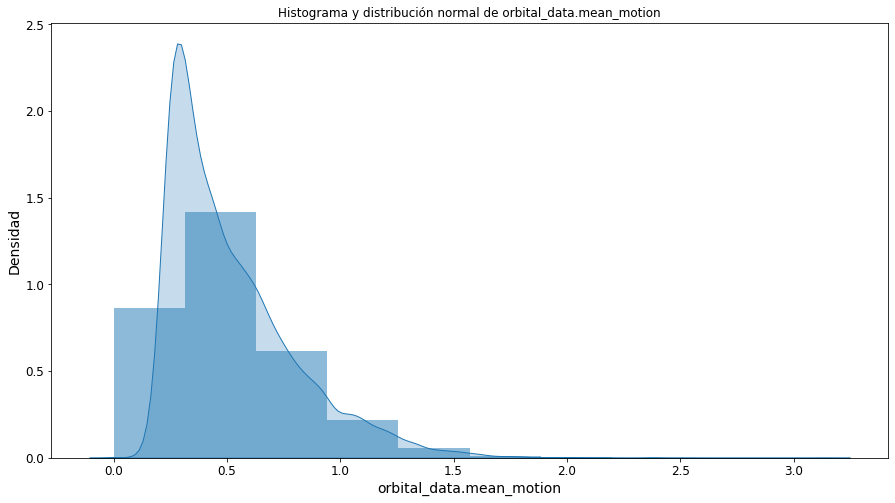

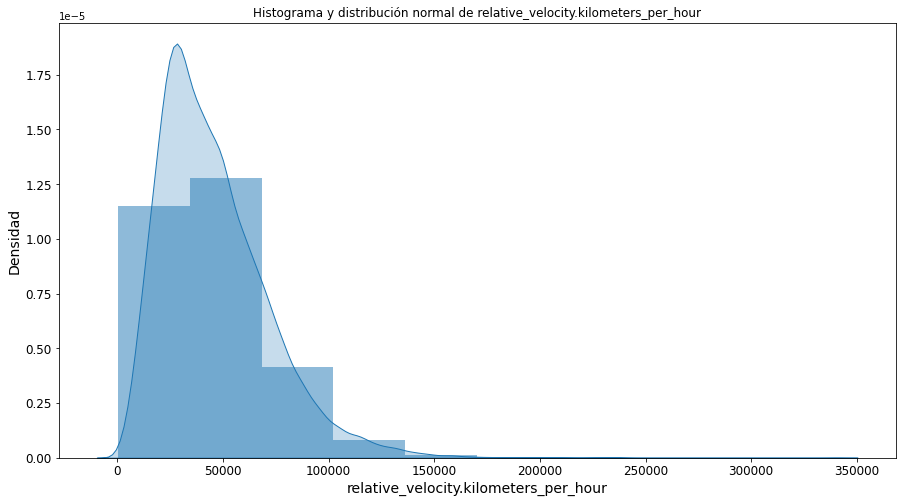

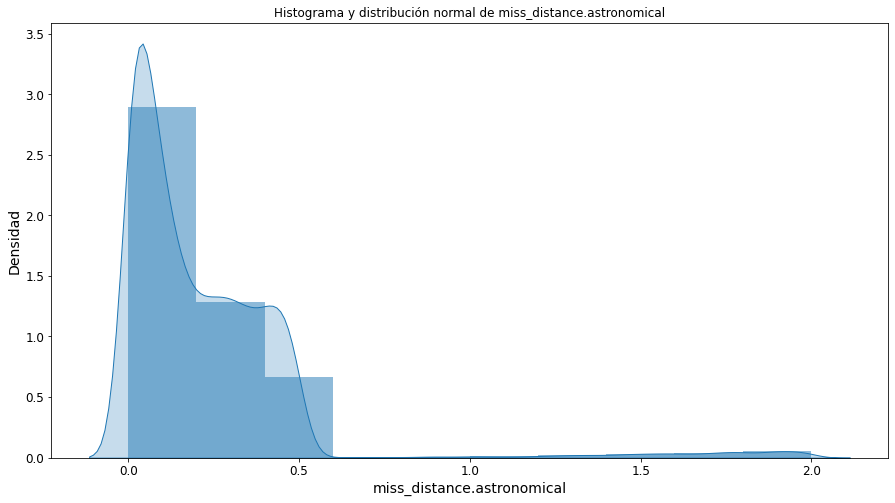

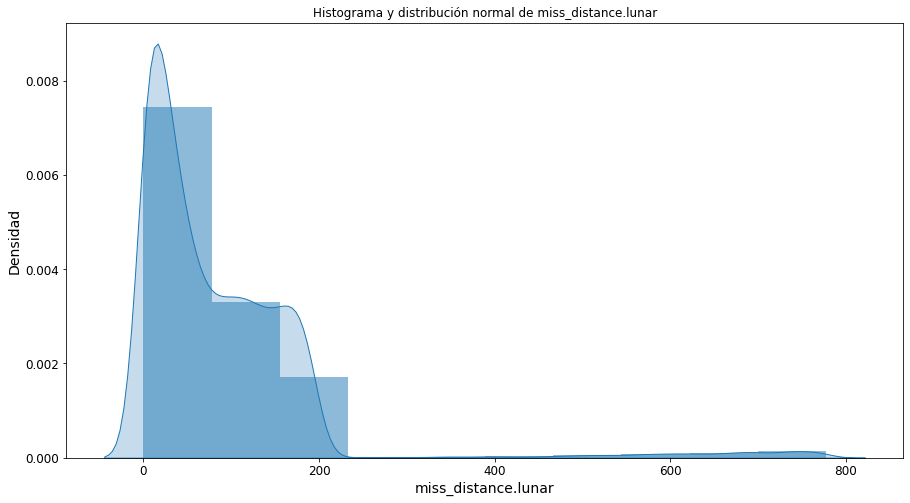

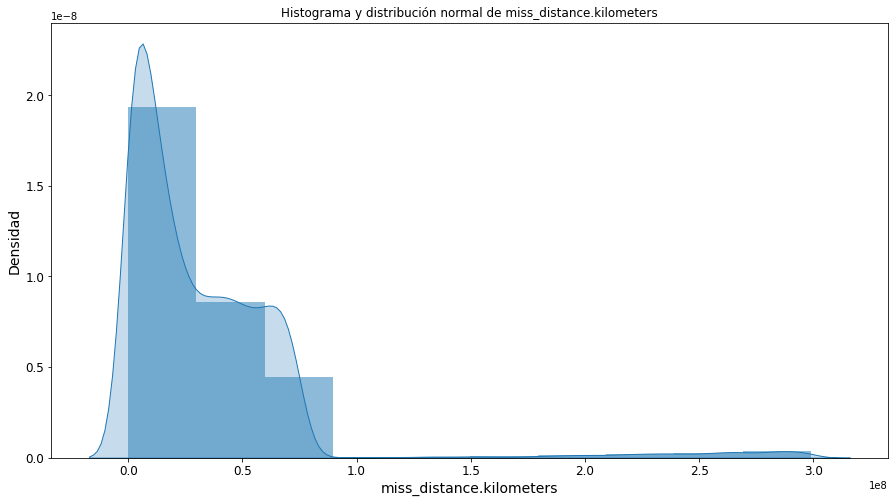

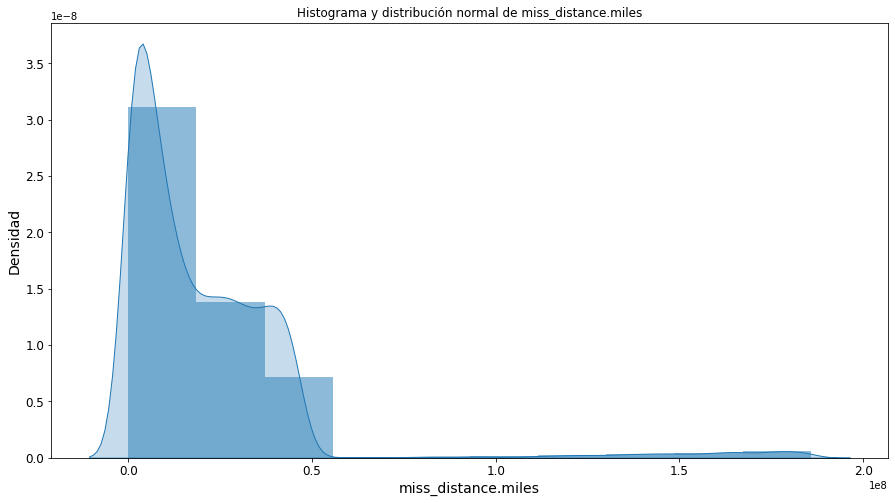

In [33]:
# Aqui se muestra la curva de densidad para observar mejor la distribucion que tienen las columnas

for col in data_new.columns[data_new.dtypes == 'float64']:
    plt.figure(figsize=(15, 8))
    sns.kdeplot(data_new[col], shade=True)
    plt.hist(data_new[col], alpha=0.5, density=True)
    plt.title("Histograma y distribución normal de " + col)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Densidad", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [34]:
# Creamos una funcion que permita crear un histograma de la columna que le pasemos como argumento

def create_histogram(dataframe, column_name):
    data = dataframe[column_name]
    sns.histplot(data=data)
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.show()

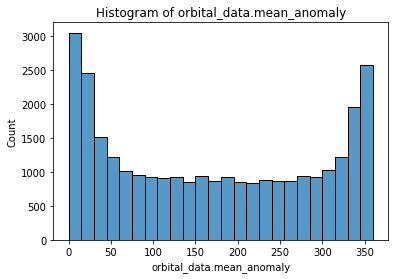

In [35]:
# Llamamos a la funcion y le pasamos una columna

create_histogram(data_new, 'orbital_data.mean_anomaly')

#### C) Análisis de correlaciones entre las variables

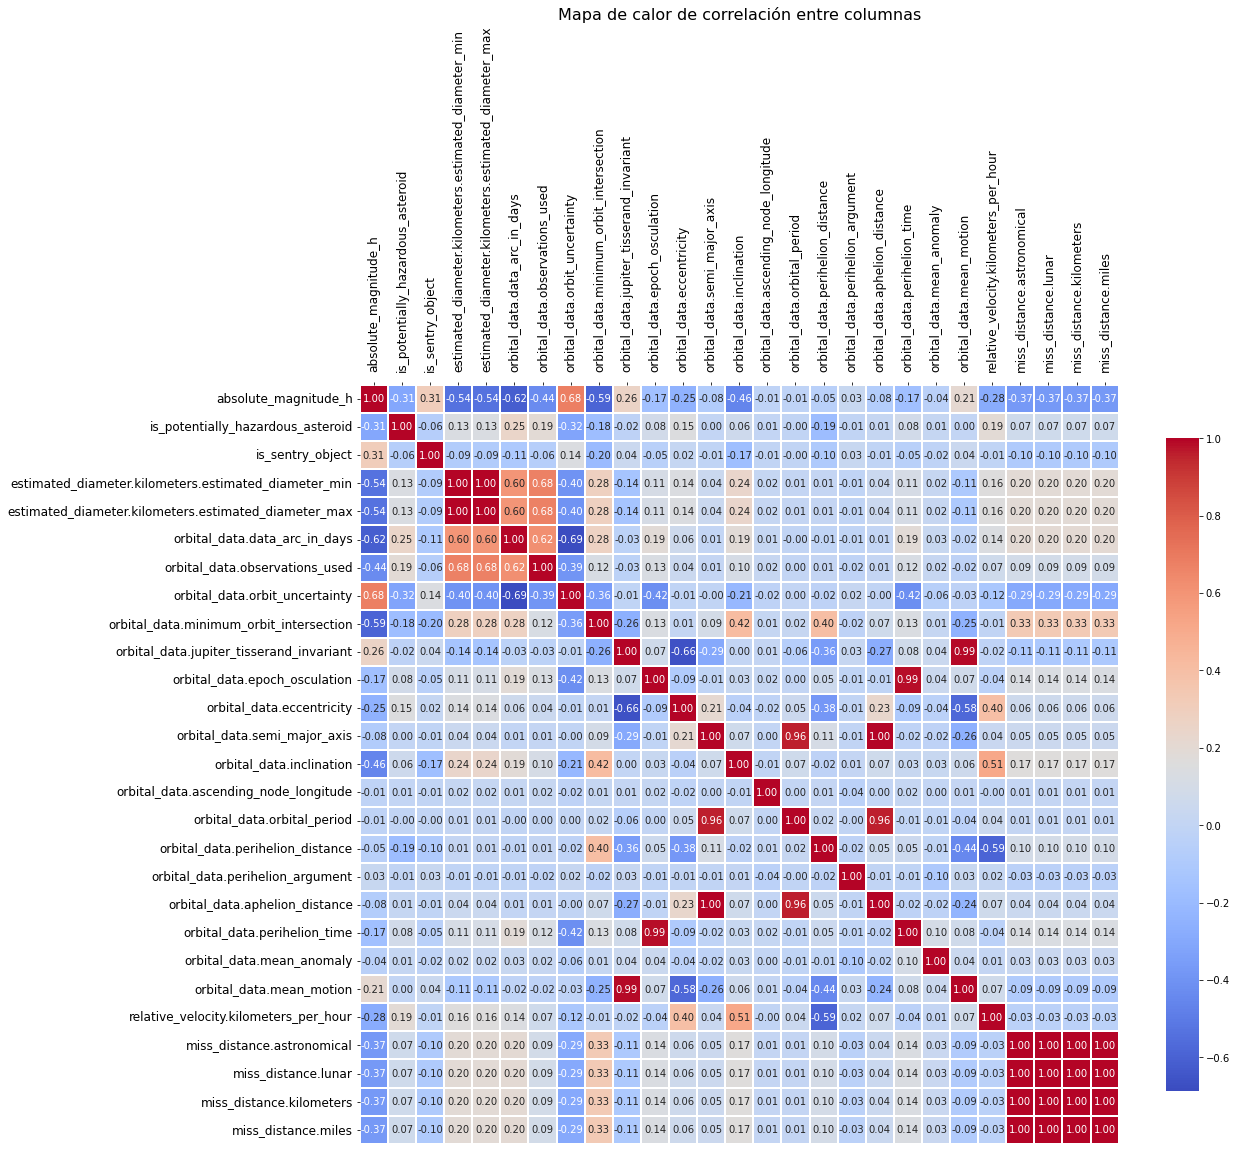

In [36]:
# Analizamos la correlacion entre las columnas del dataset

corr_matrix = data_new.corr()
plt.figure(figsize=(17, 15))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1.5, square=True, cbar_kws={"shrink": 0.8})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.tick_params(axis='x', which='major', pad=10)
plt.title("Mapa de calor de correlación entre columnas", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Observamos una fuerte correlacion entre las siguientes variables:
* orbital_data.jupiter_tisserand_invariant VS. orbital_data.mean_motion (0.99)
* orbital_data.epoch_osculation VS. orbital_data.perihelion_time (0.99)
* orbital_data.semi_major_axis VS. orbital_data.orbital_period (0.96)
* orbital_data.semi_major_axis VS. orbital_data.aphelion_distance (1)
* orbital_data.orbital_period VS. orbital_data.aphelion_distance (1)

Esto nos indica que, al elevar su valor una de las variables, la otra tambien lo hará propocionalmente.

In [37]:
# Para poder analizar la correlacion entre dos variables, creamos una funcion que permita tomar como parametros dos columnas
# del dataset, y luego llamar a la funcion para que cree el grafico

def scatter_plot(dataframe, x_col, y_col):
    """
    Función que crea un gráfico Scatter Plot a partir de dos columnas de un dataframe.

    :param dataframe: El dataframe que contiene las columnas a graficar.
    :param x_col: El nombre de la columna que se usará para el eje X.
    :param y_col: El nombre de la columna que se usará para el eje Y.
    """
    x = dataframe[x_col]
    y = dataframe[y_col]
    plt.scatter(x, y)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Scatter Plot de {} vs {}".format(x_col, y_col))
    plt.show()

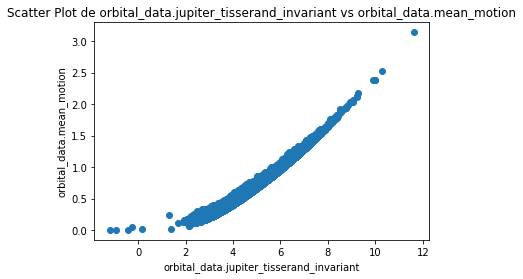

In [38]:
# Llamamos a la funcion y le pasamos las dos columnas que queremos ver

scatter_plot(data_new, "orbital_data.jupiter_tisserand_invariant", "orbital_data.mean_motion")

The data as itself is available in the 'near_earth_objects' object.
**However** is important to check out the other objects, necessary for api pagination (next exercise). 

---

### All data

The previous call was only for one page of data (the first one), but in order to continue with the challenge we need the information of **all the pages in a single dataframe**.

How can we do that?

HINT:
https://stackoverflow.com/questions/17777845/python-requests-arguments-dealing-with-api-pagination

---

## 2 - Exploring the data

Now that we have all the available data is time to explore it. Here are some of the questions to be answered.

Cleaning:

    1- Size of data.
    2- Nan information? How much? 
    3- Are there any duplicates? Remove them
    
Analysis:
    
    4- Type of each variable
    5- Distribution of the variables: "absolute_magnitude_h", "orbit_class_type", "is_sentry_object"
    6- Are there outlier values in the numeric features "kilometers_per_hour" and "kilometers_per_second"?
    7- Extract year and month from close_approach_date and check the distribution of each one.
    8- Scatter plot between "average_estimated_diameter_km" (create that feature) and "is_potentially_hazardous_asteroid"
    9- Scatter plot between "average_estimated_diameter_km" and "kilometers_per_hour"

Don't limit your exploration to this, do others analysis and plotting that you consider useful.